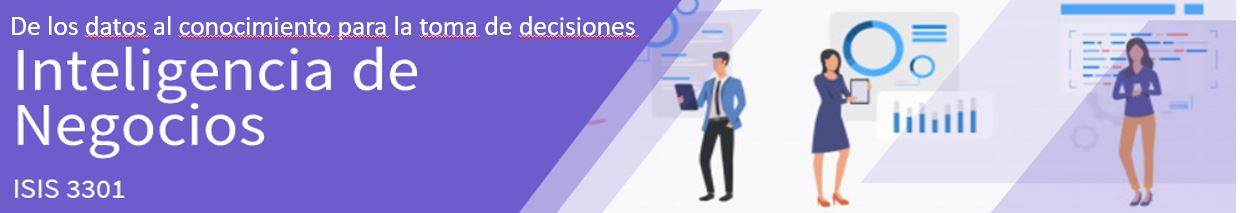

## Tarea de agrupación (Clustering)

El objetivo de este notebook es mostrar cómo resolver una tarea de agrupación o clustering utilizando la librería scikit-learn. Tomaremos como caso de estudio BiciAlpes y veremos cómo realizar el proceso de realizar un modelo de analítica basado en aprendizaje automático, siguiendo la metodología ASUM-DM. En el proceso, se identifican las fases de entendimiento de datos, preparación de los datos, construcción y evaluación del modelo. 

A continuación, trabajaremos por iteraciones con el fin de mostrar un avance a BiciAlpes. Se sugiere realizar tres iteraciones:

* **Iteración1.** Primer modelo con lo básico para familiarizarse con la metodología y las librerias. Este modelo no es apropiado para ser entregado a BiciAlpes. Hace parte del primer paso en la formación de científicos de datos
* **Iteración2.** Segundo modelo con mejoras a nivel de selección, preparación de variables, preparación de datos y configuración de hiperparámetros
* **Iteración3.** Modelo final que incluye mejoras identificadas al revisar mejor la literatura, en la interacción con el profesor(a) o escuchando comentarios de compañeros.

En cada iteración es posible que intervengan los siguientes pasos relacionados con la metodología a utilizar:
1. Preparación de los datos para crear el modelo.
2. Creación de un modelo de k-means.
3. Validación y ajuste de hiperparámetros propios del algoritmo de k-means.
4. Evaluación del modelo - cuantitativo y cualitativo que corresponde a la interpretación del modelo con base en los objetivos de negocio.

## Caso
BiciAlpes es una organización que presta un servicio de alquiler de bicicletas, solidario y con muchos beneficios para los usuarios. Su objetivo es incentivar planes de movilidad sostenible en zonas urbanas, que contribuyan a reducir la emisión de gases de efecto invernadero que afectan la temperatura del planeta. 

En el último año, BiciAlpes ha detectado con preocupación que el uso de la bicicleta se está viendo obstaculizado por la falta de información sobre la seguridad en las vías. Ellos consideran que proporcionar a los ciclistas información sobre las rutas más seguras podría contribuir a aumentar la práctica de esta actividad. Es así, como decide emprender un estudio para conocer cuáles son los factores que más impactan en los accidentes viales que involucran ciclistas. Este conocimiento, además, podría ayudar a las autoridades y planificadores urbanos en la implementación de mecanismos que reduzcan la ocurrencia de accidentes, así como otros planes de movilidad sostenible. 

BiciAlpes los ha contactado para realizar este proceso de caracterización e identificación de patrones que puedan ser utilizados para entender los factores que inciden en la severidad de los accidentes, con el fin de trazar mapas de seguridad vial para los ciclistas. Los datos fueron recopilados de fuentes abiertas de la Alcaldía, sobre accidentes en los cuales se han visto involucrados ciclistas. 

Para realizar este estudio los datos, al igual que el diccionario de datos, los encuentra disponibles en este directorio: datos.


## Referencias

1. [Python Data Science Notebook]("https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html")
2. [Documentación de algoritmos para clustering en Sikitlearn]("https://scikit-learn.org/stable/modules/clustering.html")
3. [Datos a utilizar: Datos_BiciAlpes.csv]("...")
4. [Diccionario de datos a utilizar: Diccionario_BiciAlpes.xlsx]("...")

## 0. Elementos importantes a nivel conceptual

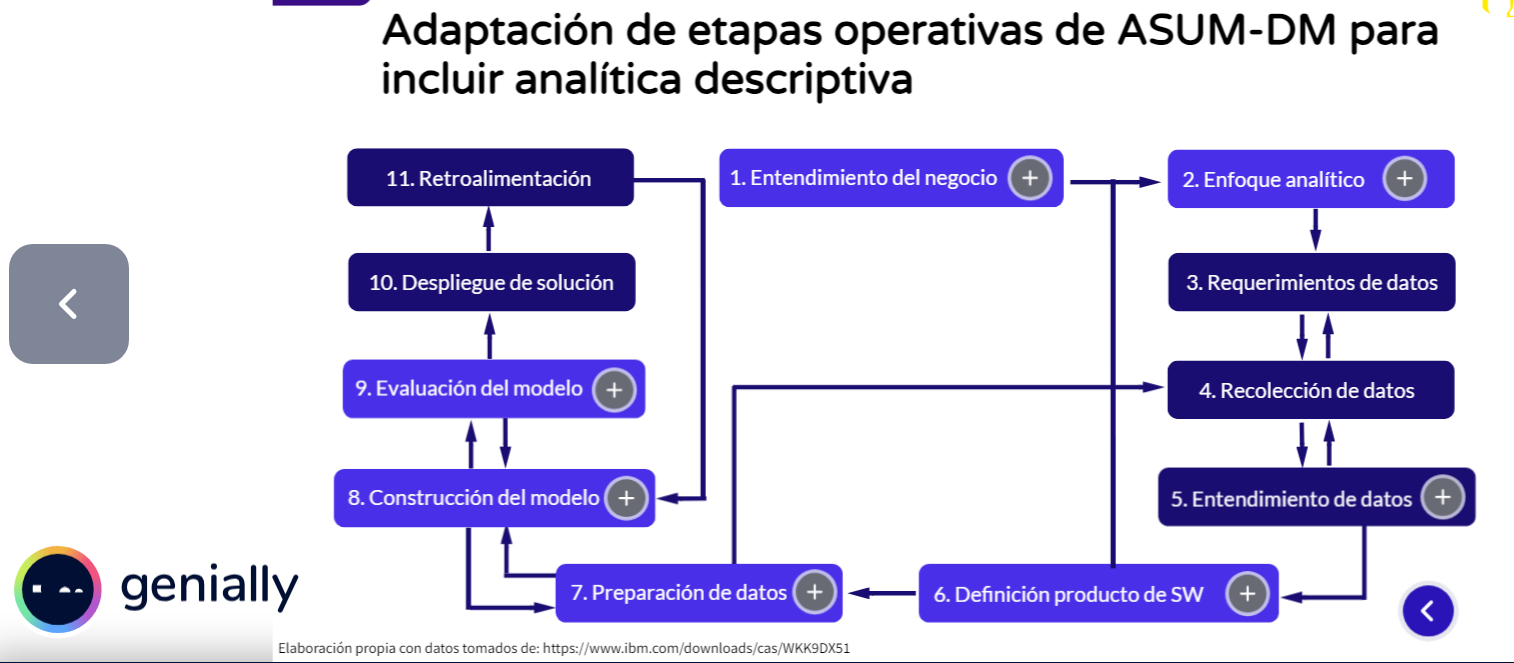

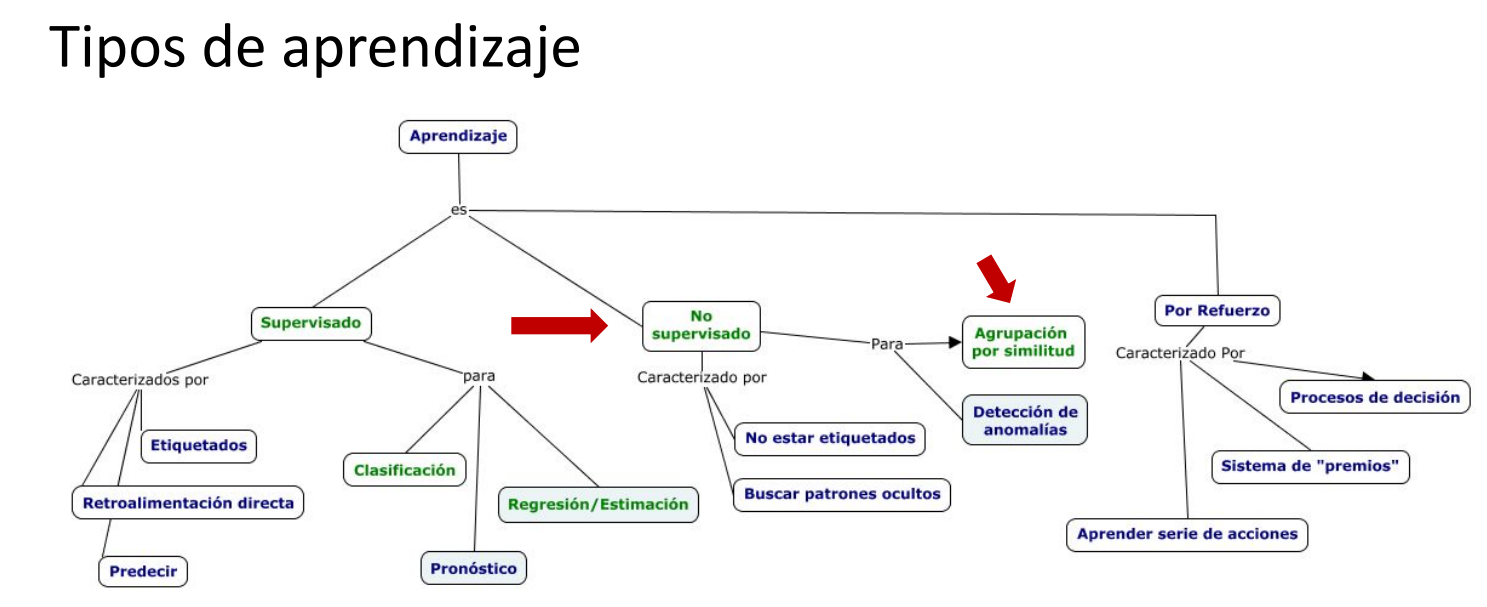

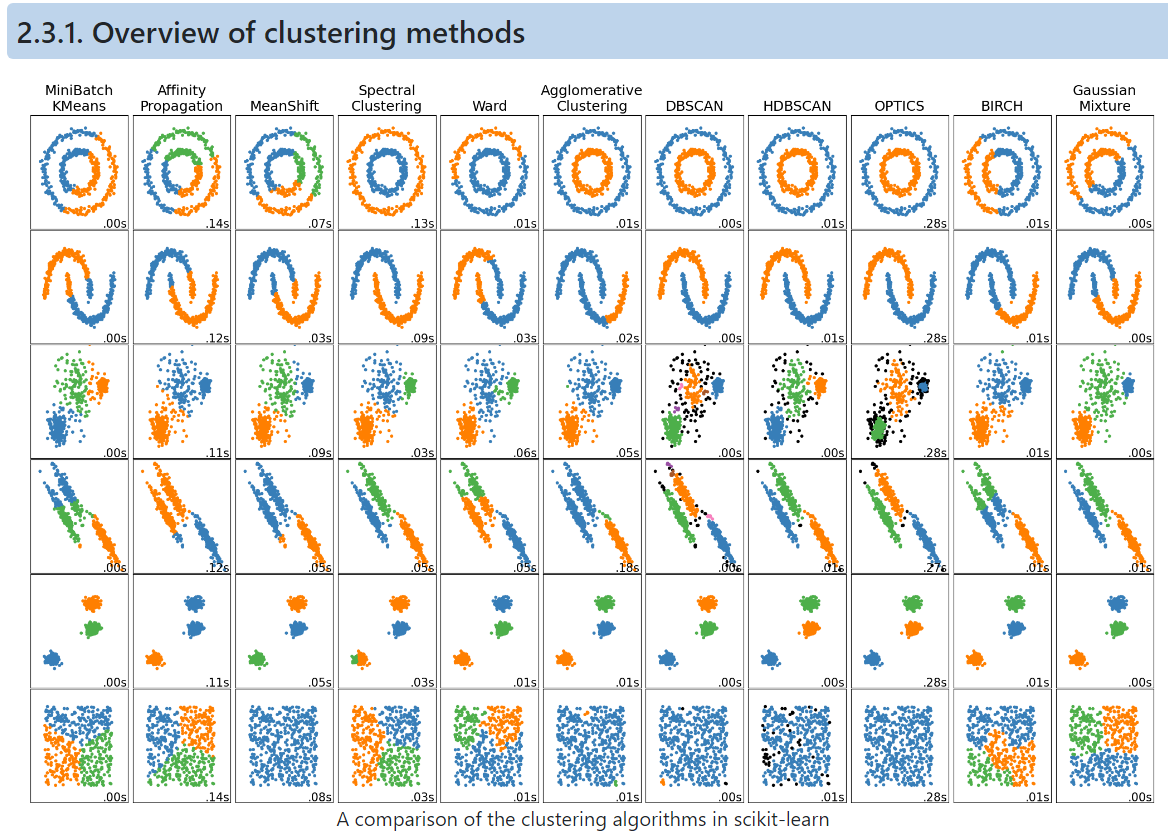

## 1. Carga de librerías necesarias para implementación

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## 2. Cargar los datos

In [2]:
# Se cargan los datos. 
# Recuerde ajustar el directorio si lo requiere para encontrar los datos
df_bicis=pd.read_csv('/workspaces/BI_Course/practico/data/Datos_BiciAlpesAgrupacion.csv', sep=';', encoding = "ISO-8859-1")

## 3. Entendimiento de los datos 

### 3.1. Perfilamiento de datos

In [3]:
df_bicis.shape

(5338, 15)

In [4]:
df_bicis.head()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,NaN
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,NaN
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN


In [5]:
# Revisar las características de los datos: completitud y tipo de dato
df_bicis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time                                         5338 non-null   object 
 1   Number_of_Casualties                         5338 non-null   int64  
 2   Day_of_Week                                  5319 non-null   object 
 3   Road_Type                                    5338 non-null   int64  
 4   Speed_limit                                  5338 non-null   float64
 5   Light_Conditions                             5338 non-null   int64  
 6   Weather_Conditions                           5338 non-null   int64  
 7   Road_Surface_Conditions                      5338 non-null   int64  
 8   Urban_or_Rural_Area                          5338 non-null   int64  
 9   Vehicle_Type                                 5338 non-null   object 
 10  

In [6]:
# Resumen de los estadisticos de las variables numéricas
df_bicis.describe()

,Number_of_Casualties,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,0.0
mean,1.118022,5.587486,33.522855,1.712814,1.532222,1.191083,1.243162,1.247096,1.898464,1.001124,2.630761,NaN
std,0.330694,1.416573,10.206576,1.456428,1.760695,0.590522,0.429032,0.453389,2.456249,0.033511,0.518214,NaN
min,1.000000,1.000000,15.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN
25%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,NaN
50%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,NaN
75%,1.000000,6.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,NaN
max,4.000000,9.000000,70.000000,7.000000,9.000000,5.000000,2.000000,3.000000,9.000000,2.000000,3.000000,NaN


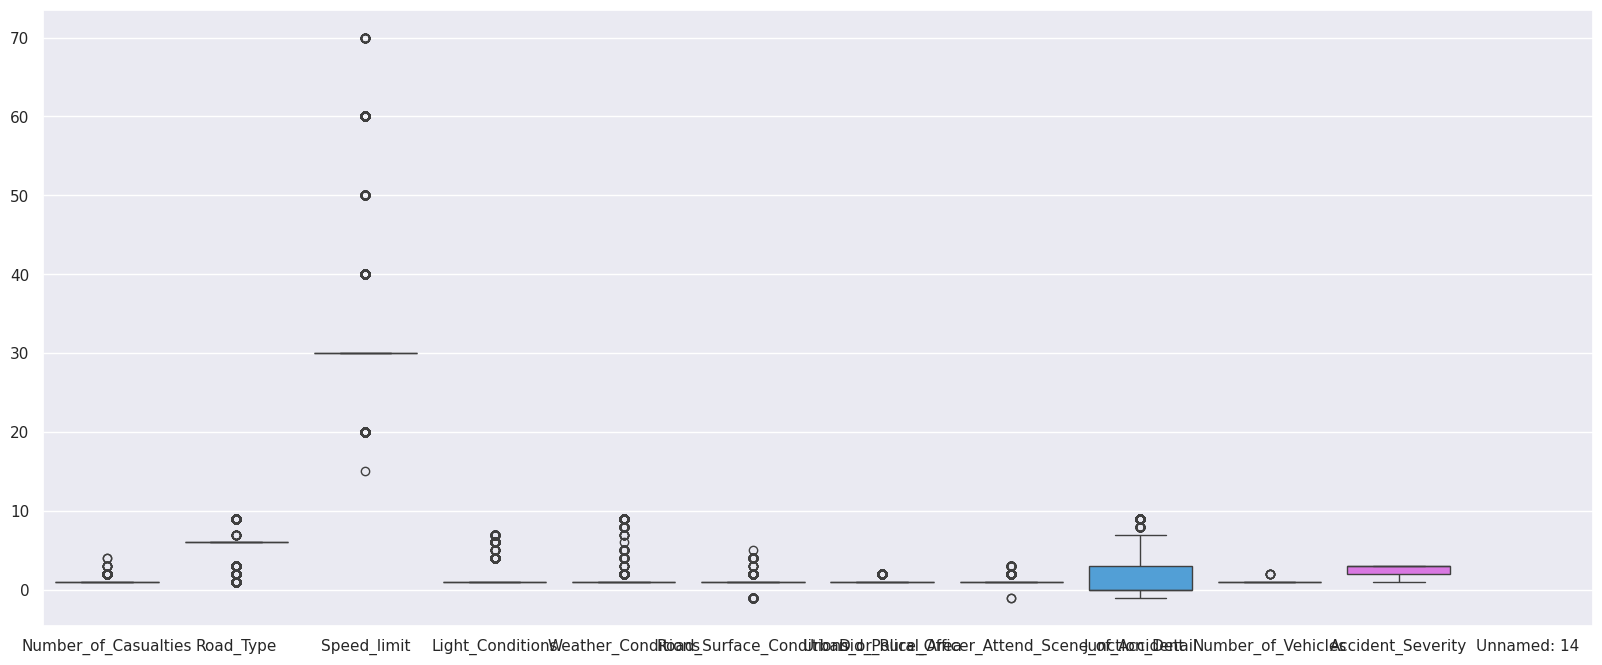

In [7]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bicis, orient="v")

Puedes ver las variables con dominios similares para entenderlas mejor. 
En este caso podrías quitar Speed_limit.

In [8]:
#Separación de la variable SPEED_LIMIT y UNNAME (float) de variables int para ver mejor su contenido dada la diferencia de magnitudes en el dominio
name_cols_float = df_bicis.select_dtypes(include = ['float']).columns
name_cols_int = df_bicis.select_dtypes(include = ['int64']).columns
name_cols_int
#name_cols_float

Index(['Number_of_Casualties', 'Road_Type', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Junction_Detail',
       'Number_of_Vehicles', 'Accident_Severity'],
      dtype='object')

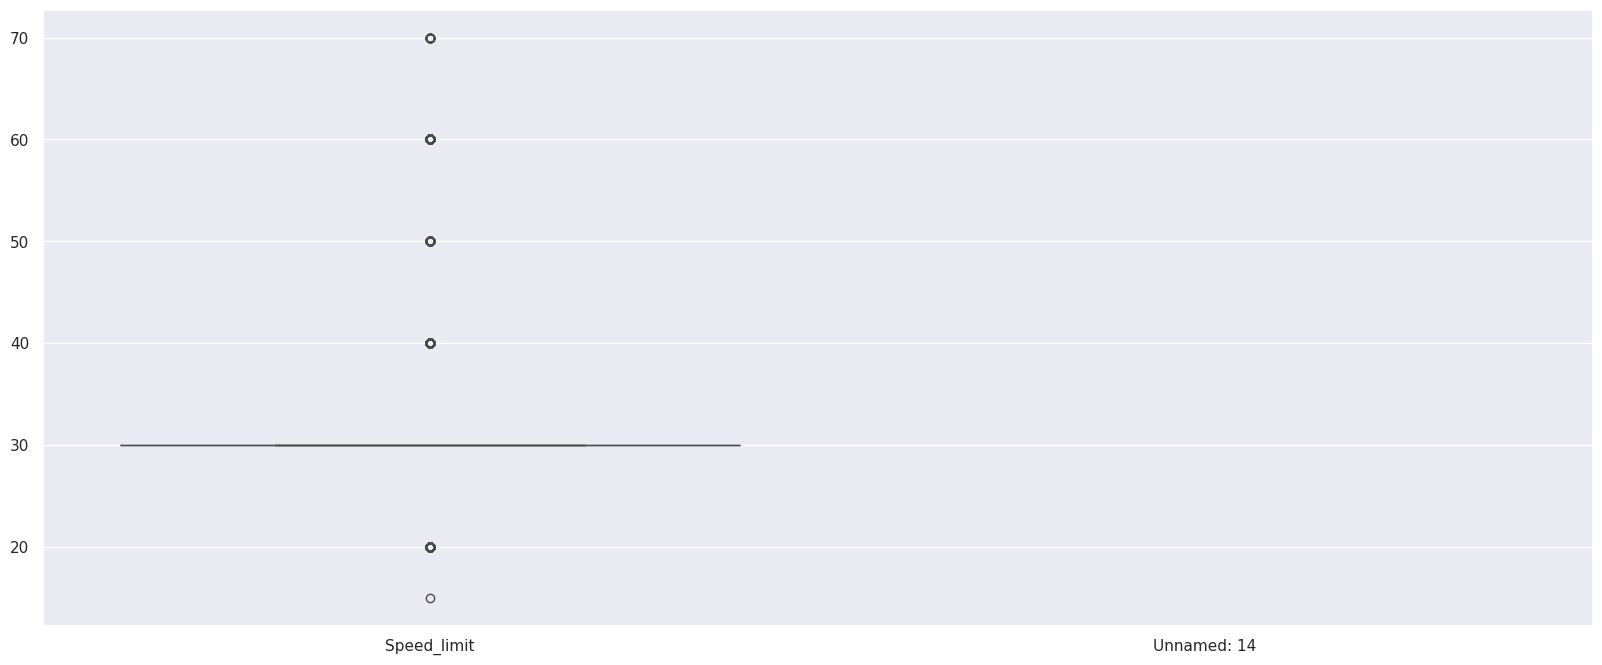

In [9]:
#Visualización de todas las variables numéricas de iipo Float
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bicis[name_cols_float], orient="v")

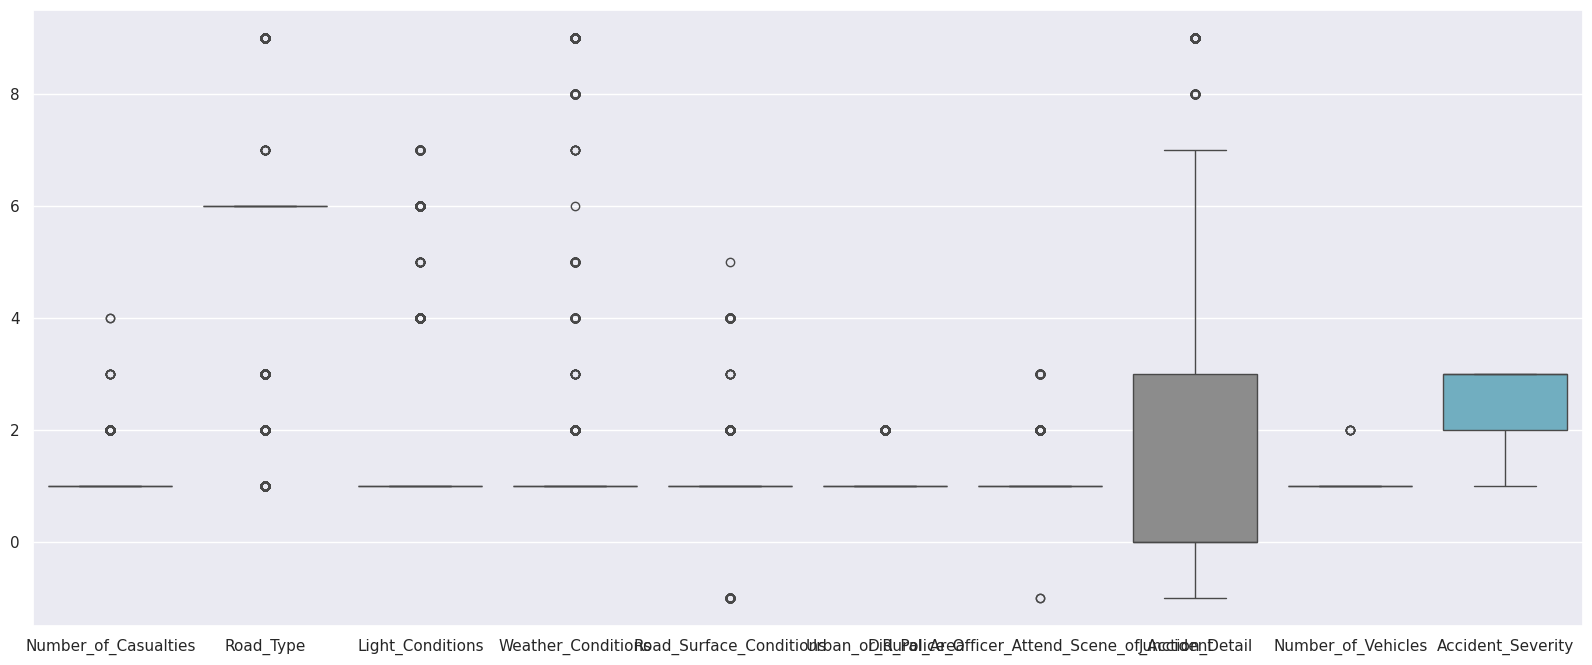

In [10]:
#Visualización de todas las variables numéricas de iipo int
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bicis[name_cols_int], orient="v")

<Span style="color:red">¿Sabes qué sifnifican los puntos que se visualizan en este diagrama de cajas? ¿Serán candidatos a ser tratados? 
 Todas las variables que tienen tipo de dato int64, serán contínuas o categóricas? Revisa el diccionario de datos</Span>

In [11]:
# Explorar las variables que no son numéricas
name_cols_non_number = df_bicis.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Time', 'Day_of_Week', 'Vehicle_Type'], dtype='object')

In [12]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
df_bicis[name_cols_non_number].describe()

,Time,Day_of_Week,Vehicle_Type
count,5338,5319,5338
unique,4,2,1
top,Tarde,Día laboral,bike
freq,2171,3832,5338


<Span style="color:red"> ¿Qué significa que Vehicle_Type tenga un valor de 1 en unique. Será importante? </Span>

In [13]:
# Revisamos en detalle el contenido de la columna Time
df_bicis.Time.value_counts()

Time
Tarde        2171
Mañana       1684
Noche        1477
Madrugada       6
Name: count, dtype: int64

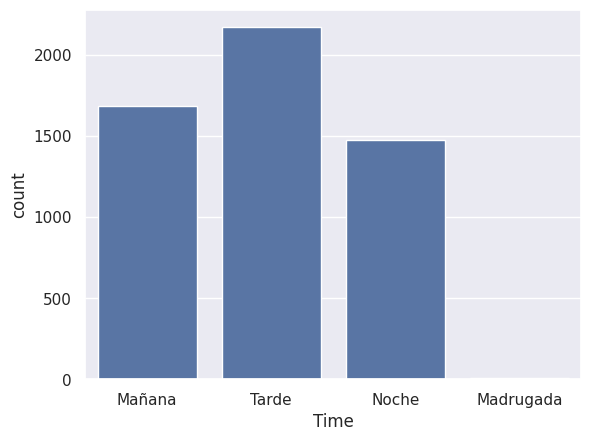

In [14]:
# Visualmente ver la cantidad de valores y de filas x valor
ax = sns.countplot(x='Time', data=df_bicis)

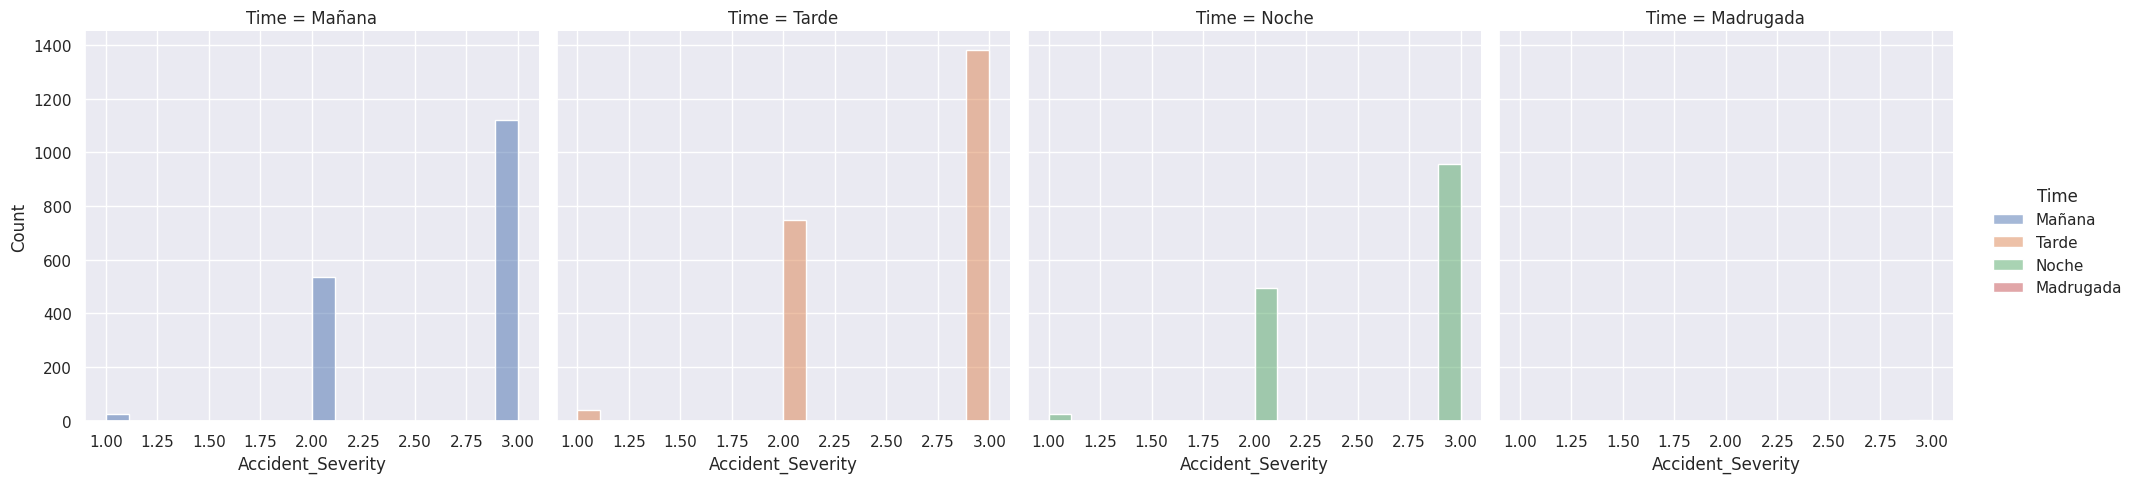

In [15]:
#Observar las distribuciones de "Accident_Severity" por cada valor de Time
sns.displot(data=df_bicis, x="Accident_Severity", hue="Time", col="Time")

Relacionado con la tarea de agrupación se sugiere analizar los grupos naturales entre variables para identificar variables candidatas a incluir en la agrupación. 

In [16]:
df_bicis

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
0,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
1,Mañana,1,Día laboral,6,30.0,1,1,1,1,bike,1,0,1,3,NaN
2,Tarde,1,Fin de semana,6,30.0,1,1,1,1,bike,1,3,1,3,NaN
3,Tarde,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,2,NaN
4,Mañana,2,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,Tarde,1,Día laboral,6,20.0,1,1,2,1,bike,1,9,1,3,NaN
5334,Noche,2,Día laboral,6,30.0,1,1,1,2,bike,2,0,1,2,NaN
5335,Tarde,1,Día laboral,6,30.0,4,5,2,1,bike,2,3,1,2,NaN
5336,Noche,1,Día laboral,6,30.0,1,1,1,1,bike,1,6,1,3,NaN


In [17]:
#Supongamos que los expertos quieren ver relaciones entre las variables: "Time","Number_of_Casualties","Day_of_Week","Speed_limit", "Light_Conditions"
cols_select=["Time","Number_of_Casualties","Day_of_Week","Speed_limit", "Light_Conditions"]
df_bicis_cols_sels=df_bicis[cols_select].copy()

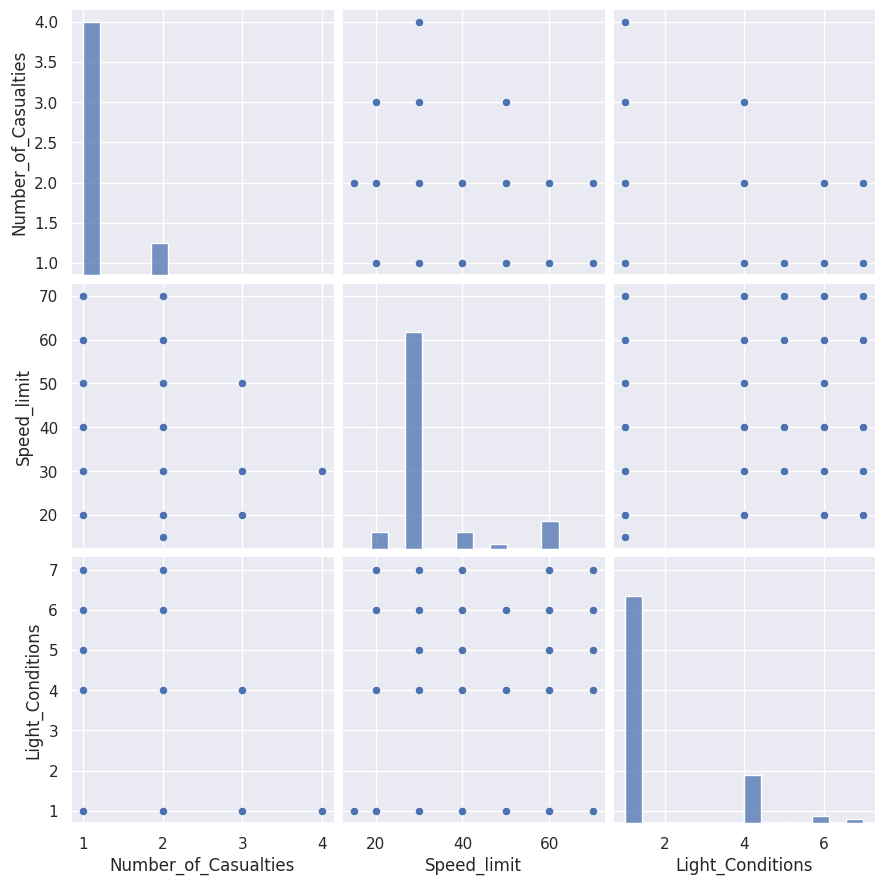

In [18]:
#Vámos las relaciones entre todas las variables numércias
sns.pairplot(df_bicis_cols_sels, height=3,kind='scatter')

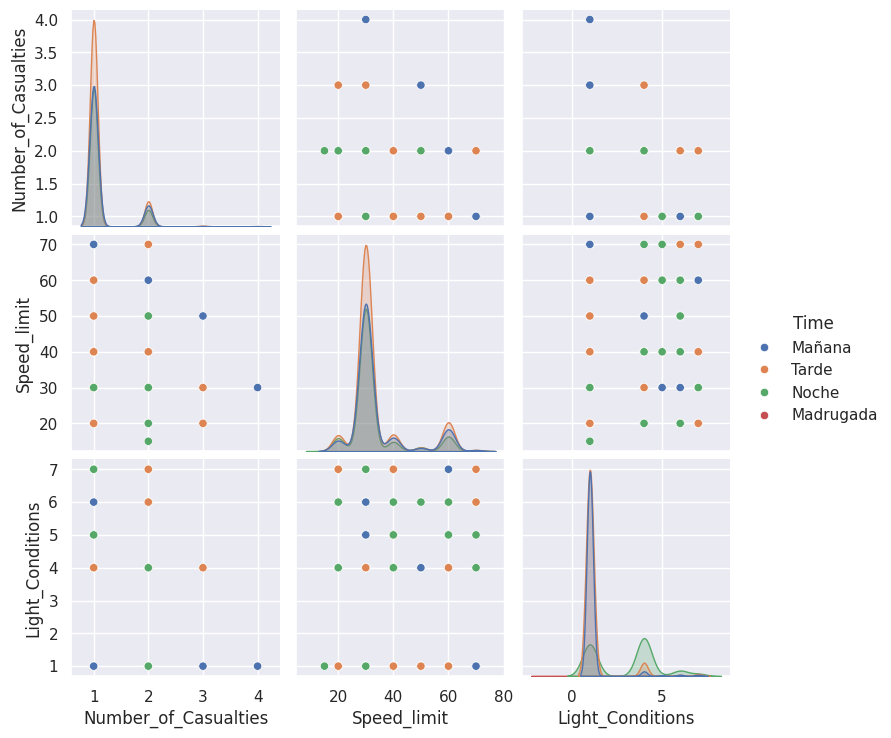

In [19]:
# En esta gráfica van a ver las relaciones entre Time y las otras variables numéricas
sns.pairplot(data=df_bicis_cols_sels, hue="Time")

**Análisis** 
1. Observamos que se identifican grupo naturales, por ejemplo: "Number_of_casualties" y "Ligh_Conditions" .con "Time", Vemos que el Valor 1 en Light_Conditions no tiene accidentes en la tarde y que cuando Number_of_Casualties es igual a 4, solo se presentan accidentes en las mañanas.
  
2. En este punto recuerde que puede llegar a conclusiones como, la variable "X" tiene varios formatos. 
3. La variable "Y"  según el diccionario tiene los siguientes valores posibles, pero en los datos identificamos estos otros valores "Z", que no conocemos.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que se deben realizar en la etapa de preparación, antes de generar un modelo de agrupación.

In [20]:
#Consulto una muestra de datos para analizarlos mejor
df_bicis[name_cols_non_number].sample(15)

,Time,Day_of_Week,Vehicle_Type
5118,Mañana,Fin de semana,bike
4771,Mañana,Día laboral,bike
2501,Noche,Día laboral,bike
4577,Tarde,Fin de semana,bike
1346,Mañana,Día laboral,bike
4526,Noche,Fin de semana,bike
3383,Tarde,Día laboral,bike
4188,Mañana,Día laboral,bike
5129,Tarde,Día laboral,bike
3839,Noche,Día laboral,bike


### 3.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [21]:
# Cálculo de porcentaje de valores nulos por columna
((df_bicis.isnull().sum()/df_bicis.shape[0])).sort_values(ascending=False)

Unnamed: 14                                    1.000000
Day_of_Week                                    0.003559
Time                                           0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
Light_Conditions                               0.000000
Number_of_Casualties                           0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.000000
Vehicle_Type                                   0.000000
Urban_or_Rural_Area                            0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000000
Junction_Detail                                0.000000
Number_of_Vehicles                             0.000000
Accident_Severity                              0.000000
dtype: float64

En este punto se observa que se tiene  una columna llamada "Unnamed: 14", que no está descrita en el diccionario de datos y tiene todos sus valores en null. Esta columna es candidata a eliminar o a no incluir en los modelos a realizar.

También, se observa que la columna Day_of_Week cuenta con un porcentaje del 0.0035559 de datos nulos, así que es posible para evitar perder la información de esas fila, completarla con un valor constante, como "desconocido", esta propuesta se valida con las personas técnicas de BiciAlpes para llegar a una decisión .

### 3.2.2 Unicidad

En este punto si se tienen las filas idénticas que representa duplicidad de los datos, no podemos garantizar que así sea, puede ser que para las variables compartidas los accidentes tengan la misma información, pero no sea el mismo accidente. Así que se puede informar el caso a BiciAlpes para validar y a nivel de los análisis la propuesta es dejar solo una fila que represente a los diferentes accidentes y eliminar las filas duplicadas. Esto se hará en la etapa de preparación de datos.

In [22]:
df_bicis.duplicated(keep = False).sum()

np.int64(3834)

### 3.2.3 Consistencia

In [23]:
# Revisamos por ejemplo, los valores de la variable categórica Time
# En este ejemplo, vemos que ya se corrigió el error que antes se tenía donde se escribía manniana y no Mañana.
df_bicis.Time.value_counts()

Time
Tarde        2171
Mañana       1684
Noche        1477
Madrugada       6
Name: count, dtype: int64

In [24]:
# Revisamos por ejemplo, los valores de la variable categórica Day_of_Week 
df_bicis.Day_of_Week.value_counts()

Day_of_Week
Día laboral      3832
Fin de semana    1487
Name: count, dtype: int64

En este punto vale la pena revisar consistencia entre columnas, por ejemplo, entre Accident_Date y Time al igual que Day_of_Week
Esto permitirá en caso de que no se cumpla la consistencia, reportarlo a nivel de entendimiento de datos para determinar el campo que se debe utilizar o las acciones a realizar para avanzar.
En nuestro ejemplo, vamos a suponer que la empresa dio prelación a la variable Time y Day_of_week y quitó la de Accident_Date.

### 3.2.4 Validez

Revisamos los valores distintos de las diferentes variables, aún no revisadas, para validar su valor. En este caso es dificil ya que no hay valores de referencia dados por BiciAlpes.

In [25]:
df_bicis['Vehicle_Type'].unique()

array(['bike'], dtype=object)

In [26]:
df_bicis['Light_Conditions'].unique()

array([1, 4, 6, 7, 5])

Observamos que todas las filas compartidas tienen como tipo de vehículo bicicleta, así que esta columna no va a aportar en los análisis. A nivel de "Light_Conditions" no se observa nada raro.

## 4. Iteración 1. Primer modelo -- Fines pedagógicos
El objetivo de este primer modelo es comprender el funcionamiento general del algoritmo en términos de datos de entrada y resultado, con el fin de entender el aporte de esta tarea de agrupación al objetivo que se planteó el negocio. De la misma manera, se ilustra la forma como se evalúa el resultado obtenido, 

### 4.1 Preparar los datos
A nivel de preparación de datos debemos fijarnos en:
- A. Correcciones relacionadas con problemas de calidad de dato: nulos, duplicados, inconsistencia, diferencia de formatos, etc.
- B. Preparación relacionada con la tarea de aprendizaje
    - Selección de columnas a incluir de acuerdo con la tarea de aprendizaje a realizar y el conocimiento del contexto del negocio
    - ...
- C. Preparación de acuerdo con el algoritmo a utilizar, en este caso K-means
    Al revisar k-means vemos que el algoritmo trabaja únicamente con datos numéricos, y no nulos así que si vamos a incluir datos categóricos debemos transformarlos a numéricos y si tenemos datos nulos debemos transformalos y en el peor escenario retirarlos del modelo ya sea la fila que los incluye o toda la columna si el porcentaje de estos valores es alto.

<Span style="color:red">¿Será que el este algoritmo se ve afectado si las variables numéricas tienen magnitudes diferentes?</Span>

### 4.1.1 Identificar las variables a utilizar - les sugerimos dos de las numéricas 

In [27]:
#Preparación relacionada con el tipo B. Tipo de tarea de aprendizaje
#Vamos a seleccionar únicamente un subconjunto de variables numéricas para facilitar la creación del modelo
cols_select=["Number_of_Casualties","Speed_limit", "Number_of_Vehicles"]
df_bicis_model=df_bicis[cols_select].copy()


In [28]:
#El número de duplicados con respecto al conjunto de datos es diferente, ya que se tiene un subconjunto de variables-
df_bicis_model.duplicated(keep = False).sum()

np.int64(5333)

In [29]:
#Correcciones relacionadas con el tipo A. Calidad de datos
# Reemplazar los valores nulos por un valor diferente al contenido actual de las columnas
#En este punto hay que justificar la decisión. Por ejemplo, se trata de un 3% de filas y el experto estuvo de acuerdo con esta solución.
df_bicis_model=df_bicis[cols_select].copy()
#Eliminar duplicados
df_bicis_model.drop_duplicates(keep = 'first', inplace = True)
#Completar datos con valores nulos fillna(-99)

In [30]:
df_bicis_model.duplicated(keep = False).sum()

np.int64(0)

In [31]:
# Fijénse que el número de registros que nos queda es muy pequeño y podrá facilitar la interpretación
# continuaremos solo para explicar el funcionamiento del algoritmo y la forma de analizar el resultado.
df_bicis_model.shape

(19, 3)

In [32]:
#Si es crírito el caso
#sns.pairplot(df_bicis_model.dropna(), height=3,vars=['Light_Conditions','Number_of_Casualties'],kind='scatter')

In [33]:
df_bicis_model

,Number_of_Casualties,Speed_limit,Number_of_Vehicles
0,1,30.0,1
3,2,30.0,1
45,1,50.0,1
49,2,30.0,2
56,1,60.0,1
62,1,40.0,1
88,1,70.0,1
101,1,20.0,1
156,2,40.0,1
175,2,20.0,1


### 4.3 Construir el modelo
¿Qué función de scikilearn utilizar para realizar k-means y qué parámetros requiere?

In [34]:
# El negocio quiere que empecemos con calma, así que nos sugiere crear dos agrupaciones - k=2
model_kmeans = KMeans(n_clusters=2, random_state=0) 


In [35]:
#Si te sale el error: AttributeError: 'NoneType' object has no attribute 'split'
# al ejecutar este comando, puedes actualizr el  "threadpoolctl" a  3.1.0 con el comando pip install threadpoolctl==3.1.0
# más información: https://github.com/scikit-learn/scikit-learn/issues/24238
#Para ver la versión actual utiliza: print(sklearn.show_versions())
res_kmeans = model_kmeans.fit(df_bicis_model)

In [36]:
#Consultar la etiqueta de la agrupación asignado a cada fila 
res_kmeans.labels_

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0],
      dtype=int32)

Es dificil de entender el resultado general viendo solo la etiqueta generada por el algoritmo, que corresponde al número de grupo al que pertenece una fila, por lo que acudimos a la visualización en gráficas.

### 4.4. Visualizar el resultado

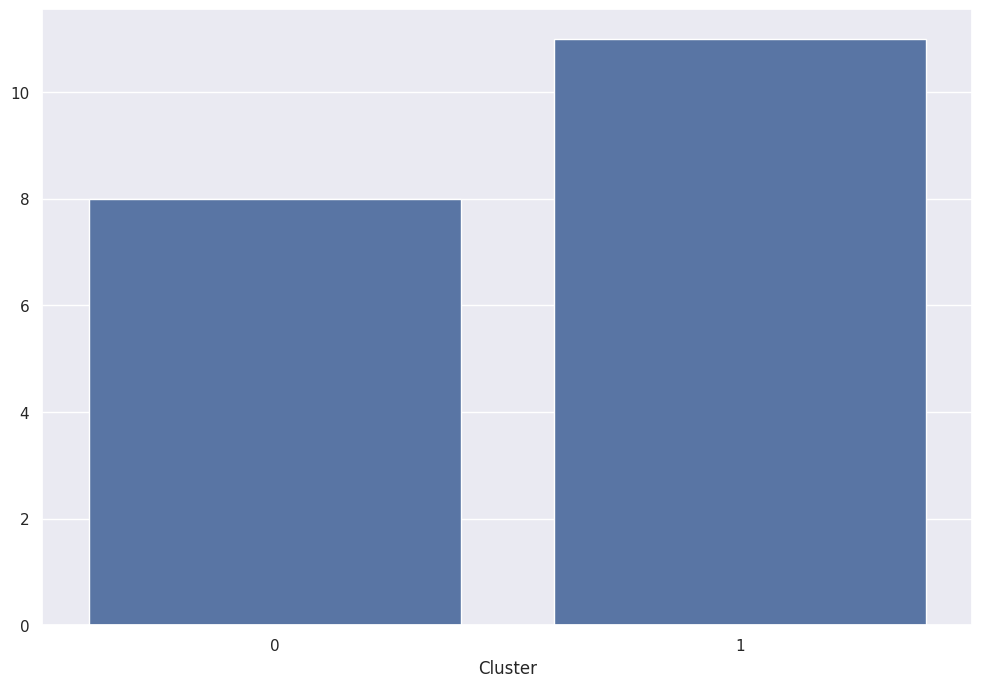

In [37]:
# Revisar la cantidad de registros en los grupos resultado
labels = res_kmeans.labels_
df_bicis_model['Cluster'] = labels

cluster_distrib = df_bicis_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [38]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_bicis_model.groupby('Cluster').count()

,Number_of_Casualties,Speed_limit,Number_of_Vehicles
Cluster,,,
0,8,8,8
1,11,11,11


In [39]:
#Transformar el contenido de las columnas a arreglo para facilitar aplicar funciones como las de visualización
cols_number = df_bicis_model.to_numpy()
cols_number

array([[ 1., 30.,  1.,  1.],
       [ 2., 30.,  1.,  1.],
       [ 1., 50.,  1.,  0.],
       [ 2., 30.,  2.,  1.],
       [ 1., 60.,  1.,  0.],
       [ 1., 40.,  1.,  1.],
       [ 1., 70.,  1.,  0.],
       [ 1., 20.,  1.,  1.],
       [ 2., 40.,  1.,  1.],
       [ 2., 20.,  1.,  1.],
       [ 2., 60.,  1.,  0.],
       [ 4., 30.,  1.,  1.],
       [ 2., 15.,  1.,  1.],
       [ 3., 30.,  1.,  1.],
       [ 2., 50.,  1.,  0.],
       [ 3., 50.,  1.,  0.],
       [ 3., 20.,  1.,  1.],
       [ 2., 60.,  2.,  0.],
       [ 2., 70.,  1.,  0.]])

In [40]:
df_bicis_model

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Cluster
0,1,30.0,1,1
3,2,30.0,1,1
45,1,50.0,1,0
49,2,30.0,2,1
56,1,60.0,1,0
62,1,40.0,1,1
88,1,70.0,1,0
101,1,20.0,1,1
156,2,40.0,1,1
175,2,20.0,1,1


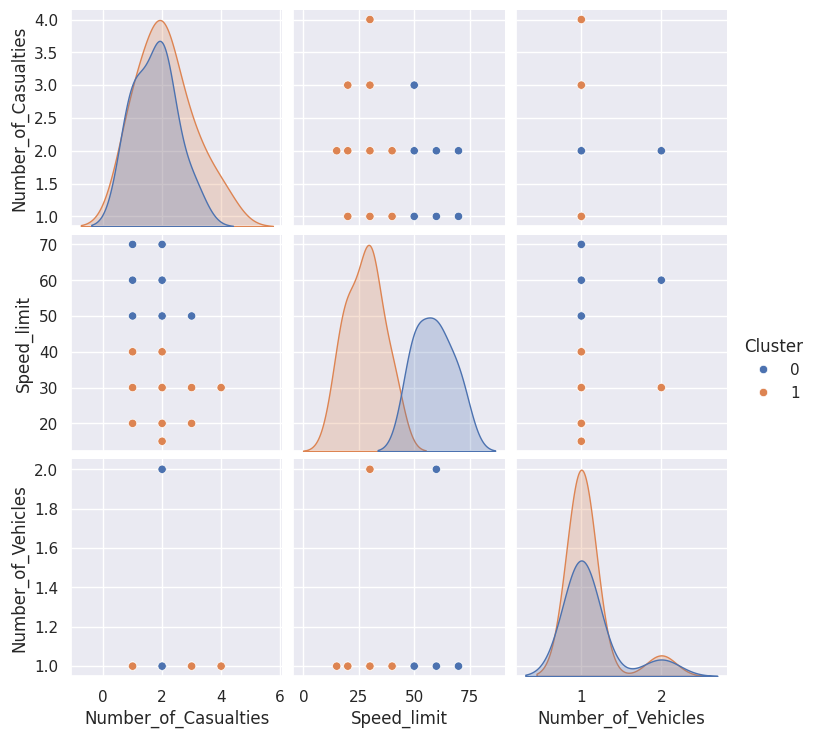

In [41]:
sns.pairplot(data=df_bicis_model, hue="Cluster")

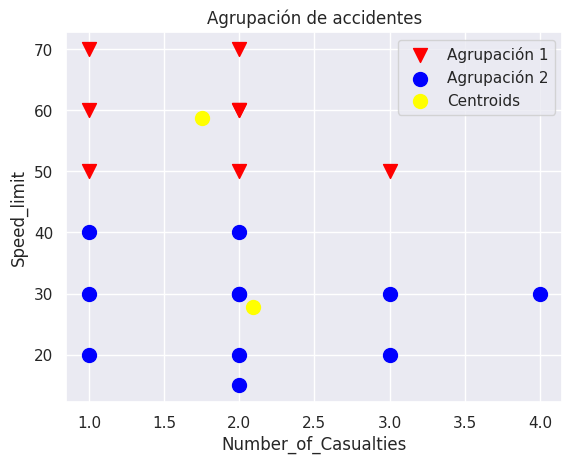

In [42]:
# Ver gráficamente en dos dimensiones -de acuerdo con el análisis de la gráfica anterior- las diferentes agrupaciones para poderlas describir mejor
# Recuerden que el describir los grupos es quizás una de las actividades más difíciles a nivel de la tarea de agrupación.
plt.scatter(cols_number[labels == 0, 0], cols_number[labels == 0, 1], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number[labels == 1, 0], cols_number[labels == 1, 1], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')

plt.scatter(res_kmeans.cluster_centers_[:, 0], res_kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Agrupación de accidentes')
plt.xlabel(cols_select[0])
plt.ylabel(cols_select[1])
plt.legend()
plt.show()


In [43]:
# Revisemos los valores de los centroides de los clústeres generados. Esta información puede ser útil durante la evaluación cualitativa del modelo
print('Centroides: [[',cols_select[0], ' ' , cols_select[1], ']]', res_kmeans.cluster_centers_)

Centroides: [[ Number_of_Casualties   Speed_limit ]] [[ 1.75       58.75        1.125     ]
 [ 2.09090909 27.72727273  1.09090909]]


### 4.5 Evaluar la calidad del modelo construido

Se identifican dos tipos de evaluación: cuantitativa y cualitativa.
Desde el punto de vista cuantitativo vamos a utilizar la "silueta" que es lo que observamos en la celda siguiente.

In [44]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1]


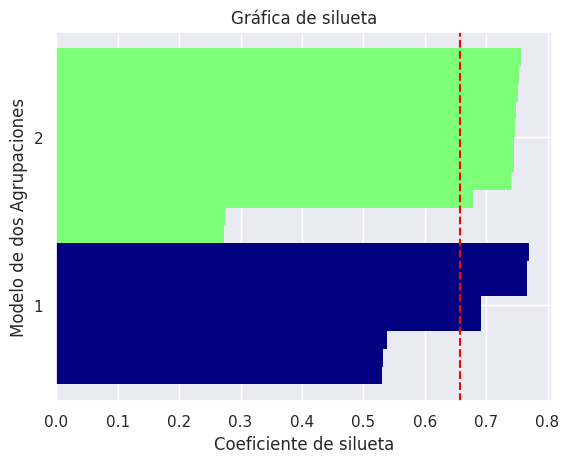

In [45]:
# Esta función puede tardar varios minutos
# Un valor cercano a 1 es un indicador de un bueno modelo. Revisa la teoría para comprender mejor el concepto
plot_silhouette(data = df_bicis_model, 
                labels = res_kmeans.labels_, 
                ylabel = 'Modelo de dos Agrupaciones')

### 4.5 Analizar y concluir
Desde el punto de vista cuantitativo se identifica un buen valor de la silueta, cercano a 0.7, aunque hay que revisar los regisstros más lejanos a 1, para identificar lo que puede estar sucediendo y si es necesario regresar a la fase de preparación de los datos para ajustarlos y volver a construir el modelo. En este caso se observa que en el grupo 1(el morado en la gráfica) ha registros con una silueta por debajo de 0.3 y en el grupo 2 (verde en la gráfica), hay registros con siluetas por debajo a 0.6. Es posible que esos valores sean atípicos. 

A nivel cualitativo, se observa que la variable speed_limit es la varible que aporta más en las agrupaciones generadas, (ver el resultado de la celda con la instrucción -sns.pairplot(data=df_bicis_model, hue="Cluster")-. 
Esto puede llevar a que un funcionario, en este caso de secretaría de movilidad, proponga disminuir velocidades en ciertos tramos o fortalecer el cumplimiento del límite de  velocidad si ya se estableció y es apropiado.
Sin embargo, recordemos que no se ha hecho un tratamiento adecuado de variables ni de ajuste de hiperparámetros, por lo cual este modelo no es adecuado utilizarlo en el ambiente de BiciAlpes.

## 5. Iteración2. Segundo modelo con mejoras a nivel de preparación de datos y configuración de hiperparámetros
En esta iteración profundizaremos en la preparación de los datos para obtener resultados correctos y en la parte de configuración de hiperparámetros que lleven a mejores modelos. Es así como vamos a probar con un método para la selección del hiperparámetro k (número de agrupaciones a generar). 

### 5.1. Preparación de datos

In [46]:
#Selección de variables: Esta decisión puede sustentarse en la visualización de los datos y con los criterios dados por las personas de la organziación para la que se hace el proyecto.
#Te proponemos trabajar con las columnas numéricas de la iteración 1 pero en esta ocasión normalizadas, ¿entiendes por qué hacerlo? 
# Además, vamos a incluir una variable categórica con la preparación respectiva. ¿Por qué no utilizarla directamente si es numérica?
#En este punto es muy importante retomar el análisis a nivel de entendimiento de datos hecho y revisar de nuevo el diccionario de datos para entender la naturaleza de las variables compartidas

cols_select2=["Number_of_Casualties","Speed_limit","Number_of_Vehicles", "Time"]
cols_number=["Number_of_Casualties","Speed_limit","Number_of_Vehicles"]
cols_category=["Time"]
df_bicis_model2 = df_bicis[cols_select2].copy()

In [47]:
# Ejemplos de opciones para transformar una variable categórica a una numércia - LabelEncoder y OneHotEncoder
# En este ejemplo, usaremos OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
transformed = enc.fit_transform(df_bicis_model2[cols_category])
print(enc.categories_[0])
#Incluir en el dataframe la  transformación de la varibale Time 
df_bicis_model2[enc.categories_[0]] = transformed.toarray()


['Madrugada' 'Mañana' 'Noche' 'Tarde']


<Span style="color:red"> ¿Cómo me devuelvo y obtengo los valores originales para los análisis?</Span>

In [48]:
df_bicis_model2.describe()

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Madrugada,Mañana,Noche,Tarde
count,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000,5338.000000
mean,1.118022,33.522855,1.001124,0.001124,0.315474,0.276695,0.406707
std,0.330694,10.206576,0.033511,0.033511,0.464748,0.447406,0.491265
min,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,30.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,4.000000,70.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#Guardar el nombre de las variables a utilizar en el modelo, incluyendo las nuevas columnas creadas relacionadas conla variable Time (Mañana, noche, tarde)
list_cols_transformed =np.array(enc.categories_[0]).tolist()
cols_transformed = cols_number+list_cols_transformed
cols_transformed

['Number_of_Casualties',
 'Speed_limit',
 'Number_of_Vehicles',
 'Madrugada',
 'Mañana',
 'Noche',
 'Tarde']

In [50]:
# Vamos a llevar al mismo dominio las diferentes variables
# ¿Entiendes por qué? En este punto puedes revisar otras opciones como la de estandarización o RobustScaler.
mms= MinMaxScaler()
# transform data
df_bicis_prep_norm = mms.fit_transform(df_bicis_model2[cols_transformed])
df_bicis_model2_norm = pd.DataFrame(df_bicis_prep_norm, columns =cols_transformed)
df_bicis_model2_norm['Time'] = df_bicis_model2['Time']

In [51]:
df_bicis_model2_norm

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Madrugada,Mañana,Noche,Tarde,Time
0,0.000000,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
1,0.000000,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
2,0.000000,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
3,0.333333,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
4,0.333333,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
...,...,...,...,...,...,...,...,...
5333,0.000000,0.090909,0.0,0.0,0.0,0.0,1.0,Tarde
5334,0.333333,0.272727,0.0,0.0,0.0,1.0,0.0,Noche
5335,0.000000,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
5336,0.000000,0.272727,0.0,0.0,0.0,1.0,0.0,Noche


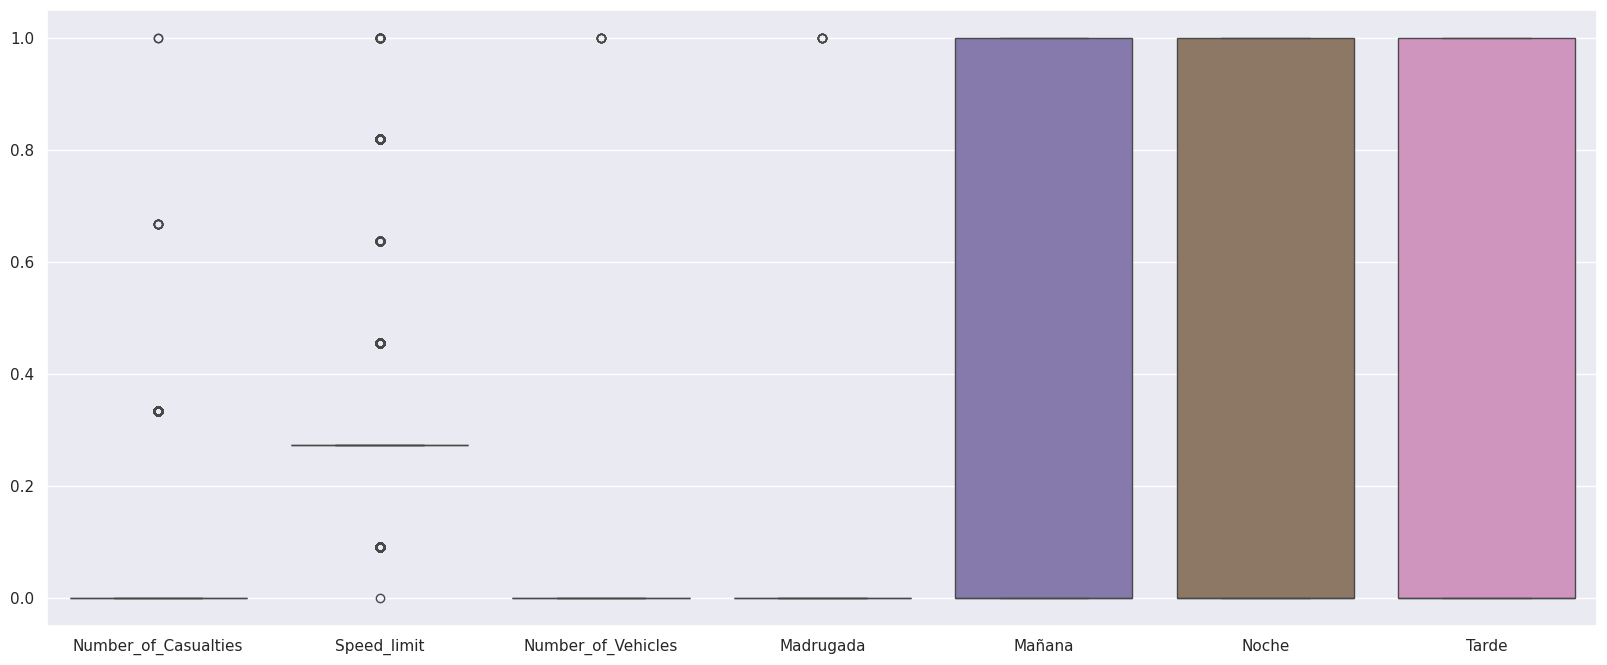

In [52]:
#Visualización de todas las variables numéricas de iipo int luego de la transformación
#¿Qué pasó con los valores atípicos?
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_bicis_model2_norm, orient="v")

### 5.2. Encontrar el número óptimo de clústeres utilizando el método del codo

In [53]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

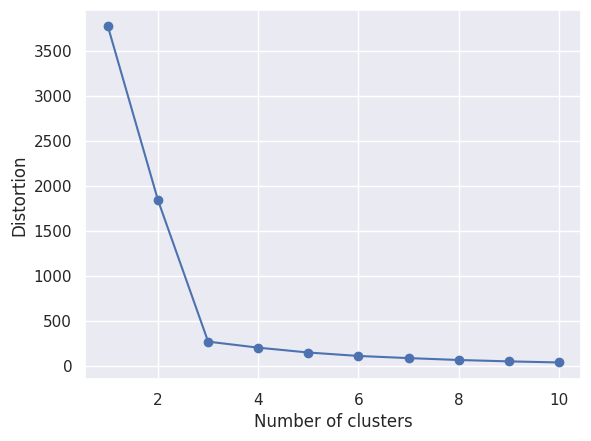

In [54]:
# En este gráfico vemos el punto en que cambia la pendiente y ese es el número sugerido para el valor de k o número de grupos.
# En este caso un valor de 3
plot_distortion(df_bicis_model2_norm[cols_transformed],1,11)

### 5.3. Construir el nuevo modelo con el número de clústeres obtenido

In [55]:
#En este punto generamos el modelo, con los datos preparados y la selección del número de grupos apoyada con el gráfico de silueta.
kmeans2 = KMeans(n_clusters=3, random_state=0) 
res_kmeans2 = kmeans2.fit(df_bicis_model2_norm[cols_transformed])


In [56]:
df_bicis_model2_norm

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Madrugada,Mañana,Noche,Tarde,Time
0,0.000000,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
1,0.000000,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
2,0.000000,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
3,0.333333,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
4,0.333333,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
...,...,...,...,...,...,...,...,...
5333,0.000000,0.090909,0.0,0.0,0.0,0.0,1.0,Tarde
5334,0.333333,0.272727,0.0,0.0,0.0,1.0,0.0,Noche
5335,0.000000,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
5336,0.000000,0.272727,0.0,0.0,0.0,1.0,0.0,Noche


### 5.4. Visualizar el resultado

### 5.4.1 Graficar la cantidad de registros por agrupación

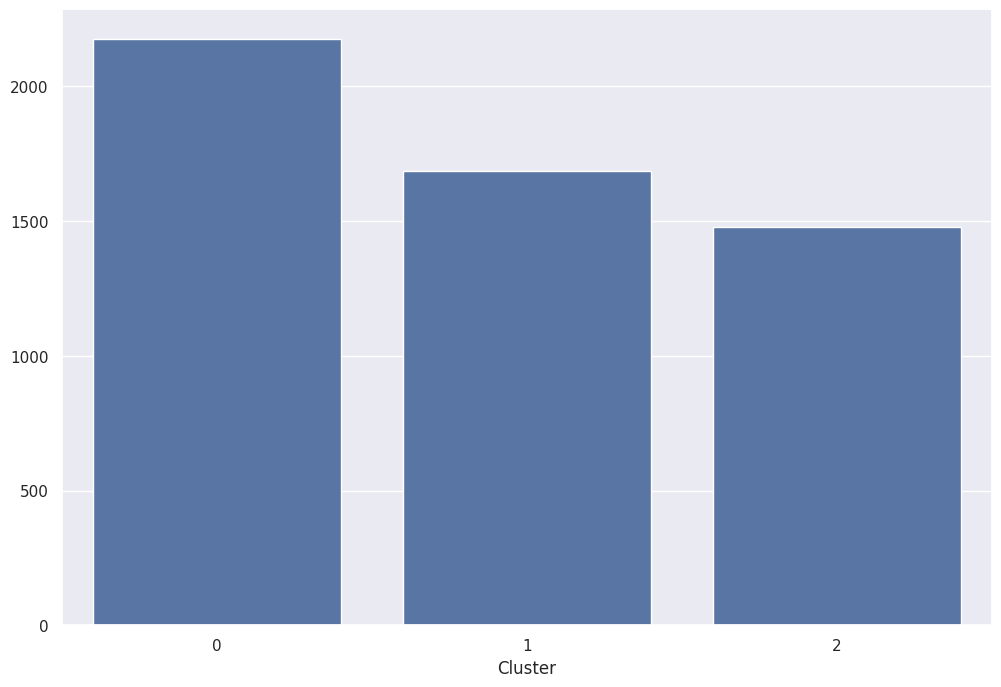

In [57]:
# Revisar la cantidad de registros en los clústeres resultado
labels = res_kmeans2.labels_
df_bicis_model2_norm['Cluster'] = labels
cluster_distrib = df_bicis_model2_norm['Cluster'].value_counts()
fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [58]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_bicis_model2_norm.groupby('Cluster').count()

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Madrugada,Mañana,Noche,Tarde,Time
Cluster,,,,,,,,
0,2177,2177,2177,2177,2177,2177,2177,2177
1,1684,1684,1684,1684,1684,1684,1684,1684
2,1477,1477,1477,1477,1477,1477,1477,1477


In [59]:
# Consultamos algunos de los registros en el clúster 0.
#Transformar el contenido de las columnas a arreglo
cols_number2 = df_bicis_model2_norm.to_numpy()
cols_number2[res_kmeans2.labels_ == 0, len(cols_transformed)-1]

array([1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0], dtype=object)

### 5.4.2  Graficar comportamiento en parejas de atributos de acuerdo a la agrupación

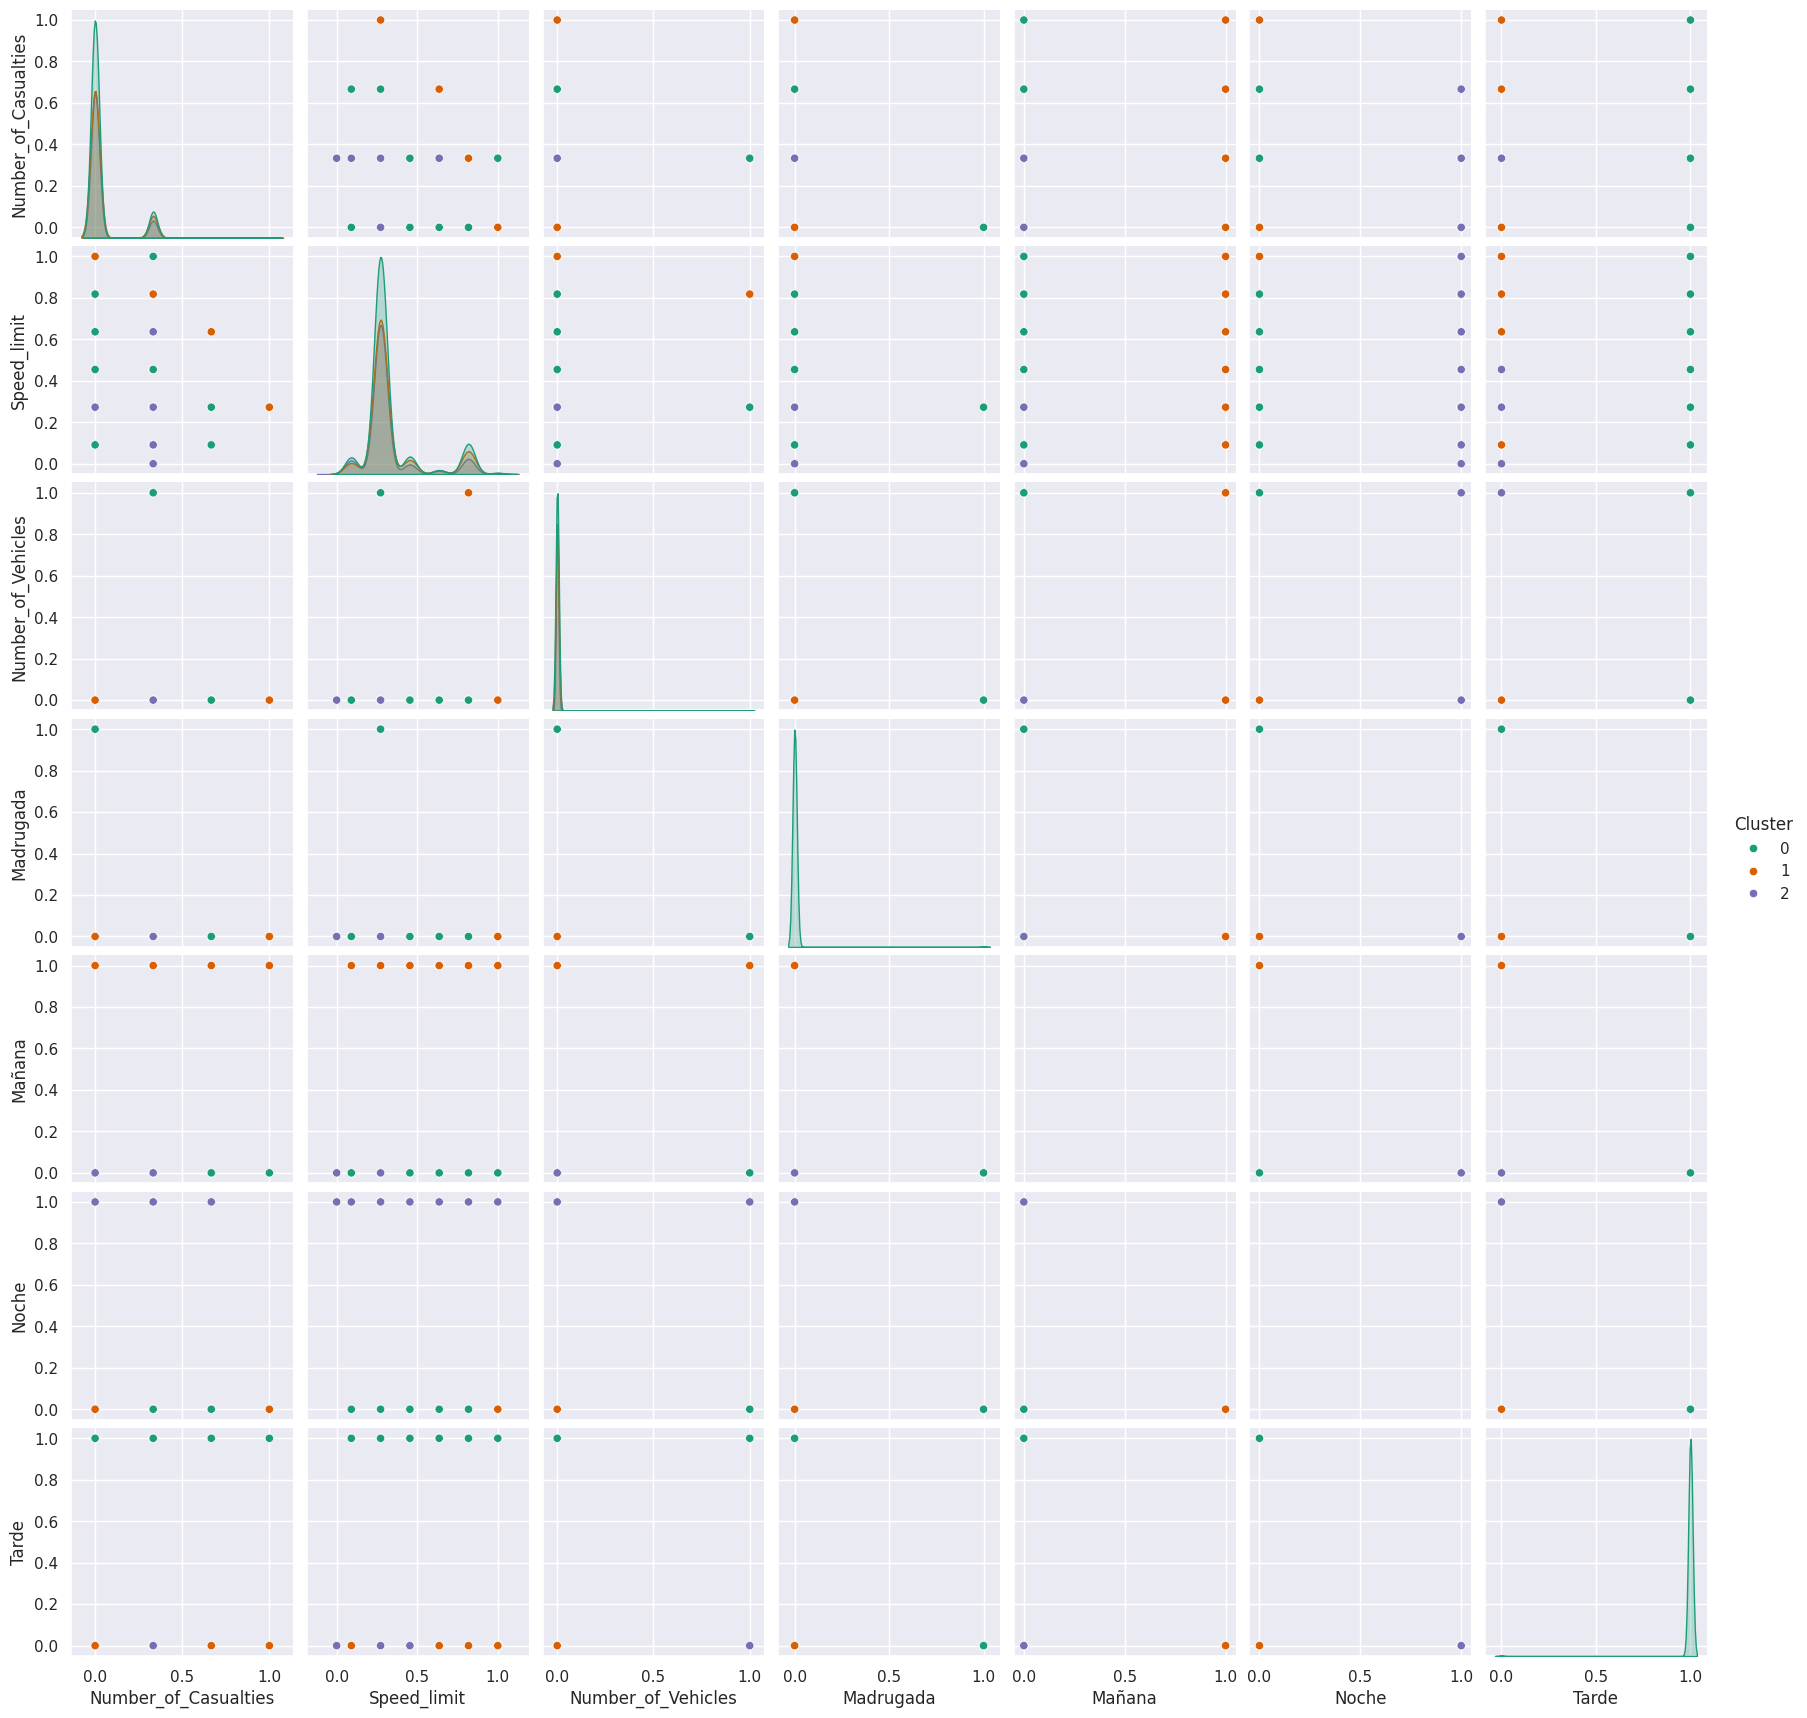

In [60]:
# El análisis de la gráfica es más dificil ya que son más columnas. Podrías filtrar las columnas para entender mejor el gráfico
# Ajustar la paleta de colores para ver mejor
sns.pairplot(data=df_bicis_model2_norm, hue="Cluster", palette="Dark2")

### 5.4.3  Graficar dos atributos y ver la relación con las agrupaciones

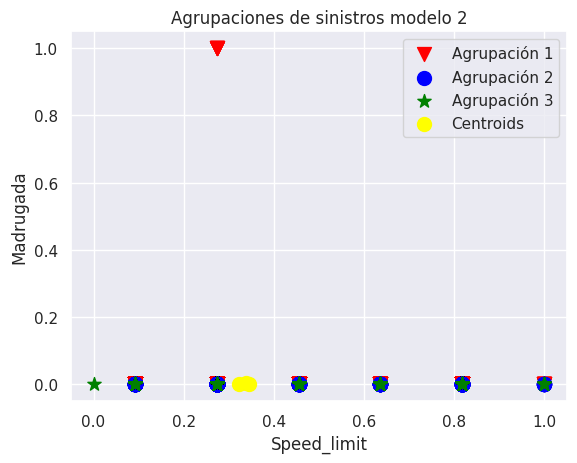

In [61]:
# El análisis lo haremos por pareja de atributos, en este caso 
plt.scatter(cols_number2[res_kmeans2.labels_ == 0, 1], cols_number2[kmeans2.labels_ == 0, 3], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number2[res_kmeans2.labels_ == 1, 1], cols_number2[kmeans2.labels_ == 1, 3], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')
plt.scatter(cols_number2[res_kmeans2.labels_ == 2, 1], cols_number2[kmeans2.labels_ == 2, 3], s = 100, marker='*', c = 'green', label = 'Agrupación 3')

plt.scatter(res_kmeans2.cluster_centers_[:, 1], res_kmeans2.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Agrupaciones de sinistros modelo 2')
plt.xlabel(cols_transformed[1])
plt.ylabel(cols_transformed[3])
plt.legend()
plt.show()


In [62]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',cols_transformed[0], ' ' , cols_transformed[1], ']]', res_kmeans2.cluster_centers_)

Centroides: [[ Number_of_Casualties   Speed_limit ]] [[ 3.78196295e-02  3.39040381e-01  1.37804318e-03  2.75608636e-03
   2.16493490e-15 -6.10622664e-16  9.97243914e-01]
 [ 4.43388757e-02  3.45389765e-01  1.18764846e-03  3.59955121e-17
   1.00000000e+00 -6.32827124e-15  3.27515792e-15]
 [ 3.58835477e-02  3.23628978e-01  6.77048070e-04  2.84060969e-17
   2.10942375e-15  1.00000000e+00  3.27515792e-15]]


### 5.4.4  Graficar los centroides de los grupos

In [63]:
cols_transformed

['Number_of_Casualties',
 'Speed_limit',
 'Number_of_Vehicles',
 'Madrugada',
 'Mañana',
 'Noche',
 'Tarde']

In [64]:
kmeans2.cluster_centers_.tolist()

[[0.03781962945950082,
  0.33904038084102395,
  0.001378043178686262,
  0.0027560863573722954,
  2.1649348980190553e-15,
  -6.106226635438361e-16,
  0.9972439136426308],
 [0.04433887569279485,
  0.3453897646296696,
  0.0011876484560570035,
  3.599551212651875e-17,
  0.9999999999999896,
  -6.328271240363392e-15,
  3.2751579226442118e-15],
 [0.03588354773188909,
  0.32362897765741366,
  0.0006770480704129879,
  2.8406096919120216e-17,
  2.1094237467877974e-15,
  1.0000000000000115,
  3.2751579226442118e-15]]

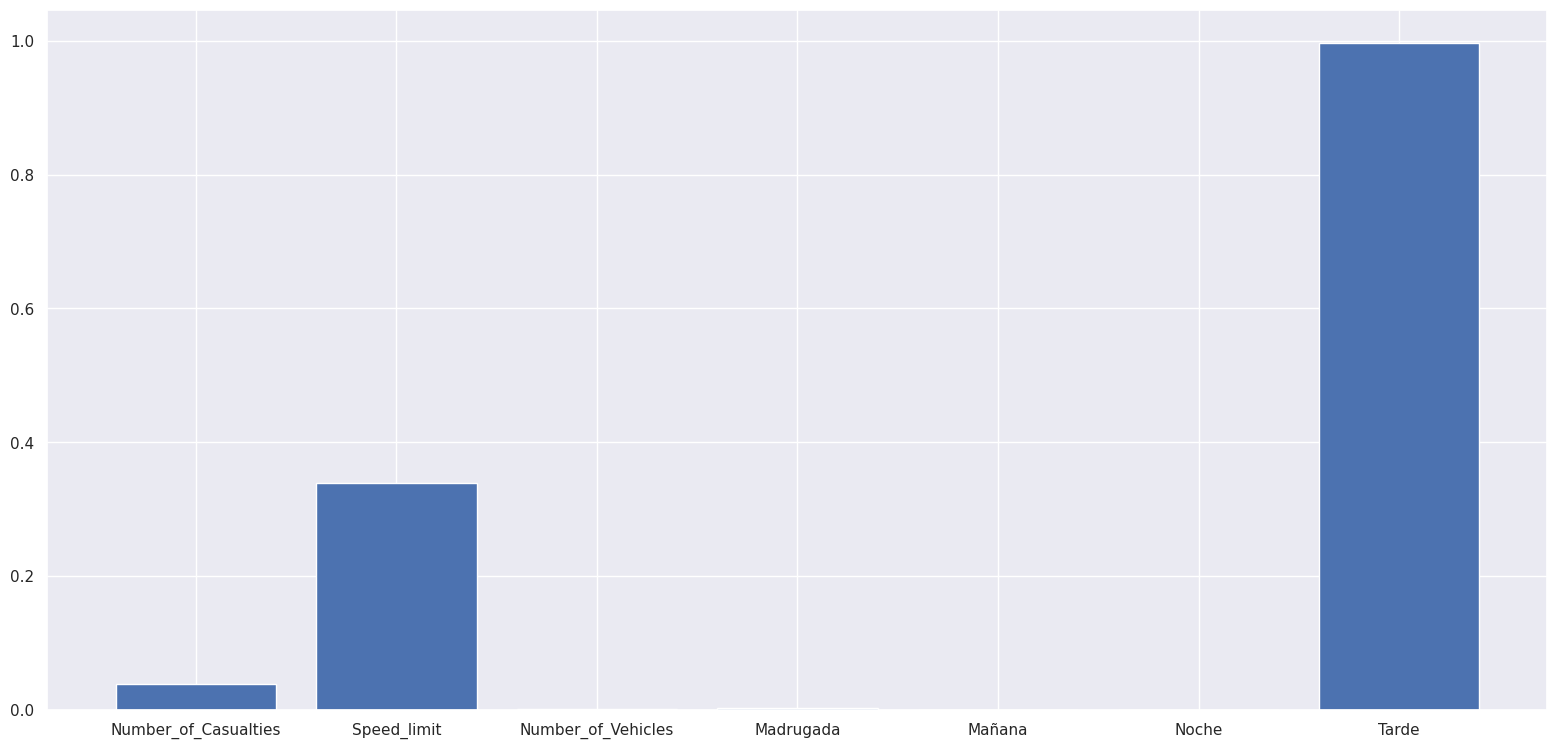

In [65]:
#visualizar los centroides de un cluster. En el ejemplo, el grupo 0. 
# En este caso dado que los datos están normalizados los valores de algunas variables son muy pequeños y no se observan en la gráfica, por ejemplo: Num_vehicles
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols_transformed,res_kmeans2.cluster_centers_.tolist()[0])
plt.show()

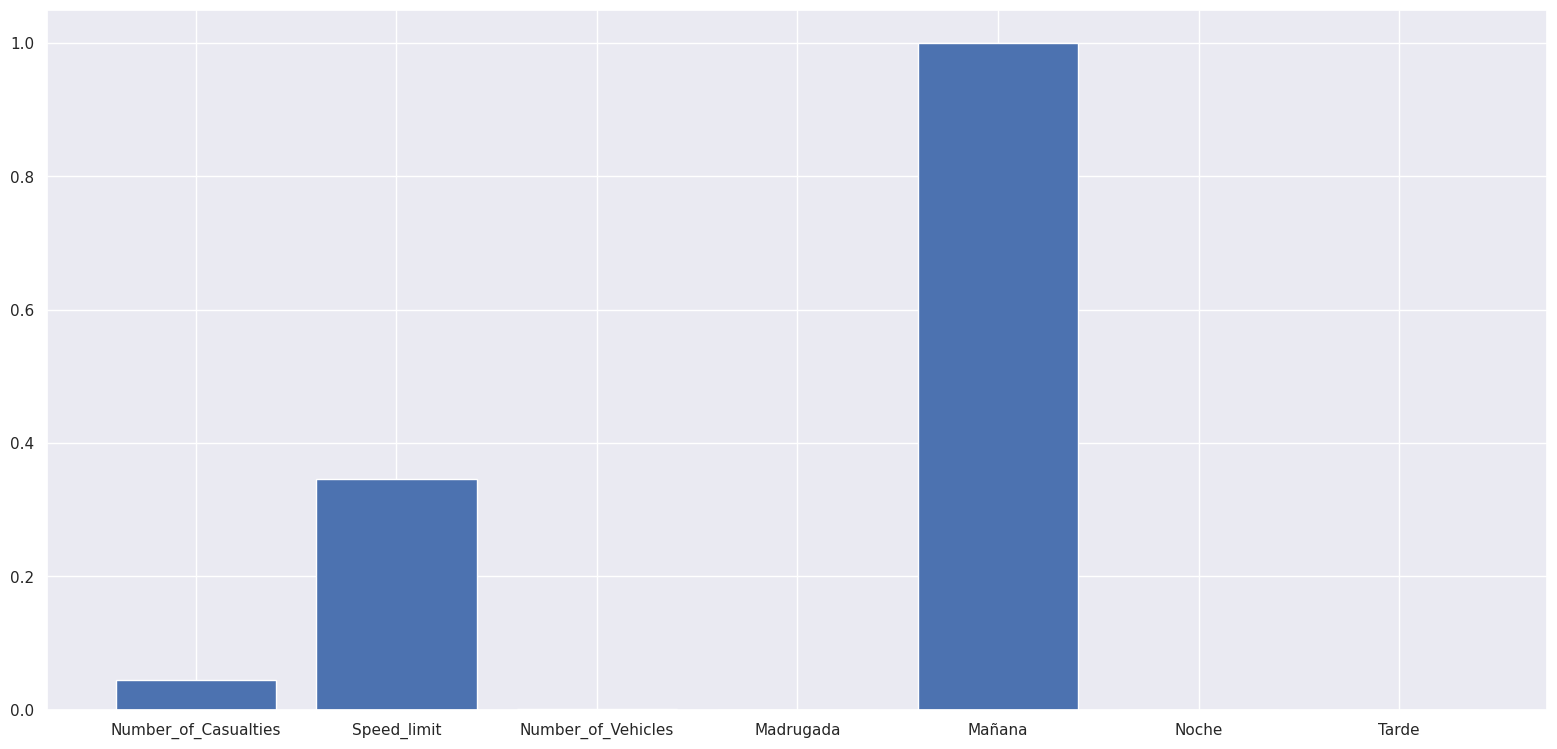

In [66]:
#visualizar los centroides de un cluster. En el ejemplo, el grupo 1. 
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols_transformed,res_kmeans2.cluster_centers_.tolist()[1])
plt.show()

### 5.5. Evaluar la calidad de los clústeres obtenidos

[0 1 2]


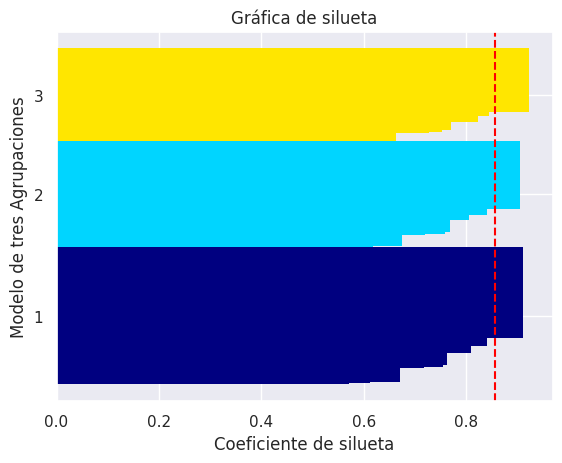

In [67]:
# Esta función puede tardar varios minutos
# Un valor cercano a 1 es un indicador de un bueno modelo. Revisa la teoría para comprender mejor el concepto
plot_silhouette(data = df_bicis_model2_norm[cols_transformed], 
                labels = res_kmeans2.labels_, 
                ylabel = 'Modelo de tres Agrupaciones')

### 5.6 Análisis y conclusiones
<Span style="color:red"> ¿Qué pasó es un mejor modelo, comparado con el primero? ¿Qué nuevas mejoras podemos incorporar para generar un siguiente modelo?
</Span>

A nivel cuantitativo vemos que la silueta es similar a los resutlados de la primera iteración y vemos que hay registros 
más alejados de 1 en los diferentes grupos. Sin embargo, a diferencia de la primera silueta estos registros tienen siluetas superiores a 0.6 en comparación con 0.3 que se identificaron en la iteración 1.

A nivel cualitativo, podemos observar que si bien, los compartamientos en los grupos a nivel de "number of casualities" y "Speed_limit" siguen caracterizando los grupos dados, como información adicional se identifica que en el grupo 1, están los accidentes que ocurren en la tarde, mientras que en el grupo 2, los que ocurren en la mañana.
Con esto presente, se puede hablar con la secretaría de movilidad para que en horarios de tarde o mañana hagan las labores preventivas relacionadas con limite de velocidad correspondiente y en BiciAlpes se generen campañas para consciencitizar a los ciclistas y reducir los accidentes.
Adicionalmente, se puede completar la exploración, revisando estos grupos, a la luz de otras variables no incluídas en el algoritmo de k-means para describirlos mejor y usar los valores no transformados para entender mejor el significado.

## 6. Iteración3. Ejercicio: Nuevo modelo con mejoras a nivel de preparación de datos 

<Span style="color:red"> 
Te proponemos incluir nuevas variables y quitar los valores atípicos e incluir análisis con variables no utilizadas en el algoritmo de kmeans.
</Span>

In [68]:
### 6.1 Identificar las variables a utilizar 
df_bicis_model3 = df_bicis.copy()

### 6.2 Preparación de datos


In [69]:
# Eliminar datos desconocidos, Junction_Detail < 0	 tu puedes hacer algo similar para otras variables
# ¿Cuantas filas se borrarían?

aux_bicis=df_bicis_model3[df_bicis_model3['Junction_Detail'] < 0]


In [70]:
aux_bicis.shape

(25, 15)

In [71]:
aux_bicis.head()

,Time,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Detail,Number_of_Vehicles,Accident_Severity,Unnamed: 14
3923,Mañana,1,Día laboral,2,20.0,1,9,1,1,bike,3,-1,1,3,NaN
4389,Mañana,1,Día laboral,9,20.0,1,2,2,1,bike,2,-1,1,3,NaN
4433,Mañana,1,Día laboral,9,30.0,1,1,1,1,bike,2,-1,1,3,NaN
4452,Noche,1,Fin de semana,6,30.0,4,1,1,1,bike,2,-1,1,2,NaN
4454,Tarde,1,Día laboral,9,30.0,1,9,-1,1,bike,2,-1,1,3,NaN


### 6.3 Construir el modelo

In [72]:
# Vamos a llevar al mismo dominio las diferentes variables
# ¿Entiendes por qué? En este punto puedes revisar otras opciones como la de estandarización o RobustScaler.
mms= MinMaxScaler()
# transform data
df_bicis_prep_norm = mms.fit_transform(df_bicis_model2[cols_transformed])
df_bicis_model3_norm = pd.DataFrame(df_bicis_prep_norm, columns =cols_transformed)
df_bicis_model3_norm['Time'] = df_bicis_model2['Time']

In [73]:
df_bicis_model3_norm

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Madrugada,Mañana,Noche,Tarde,Time
0,0.000000,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
1,0.000000,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
2,0.000000,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
3,0.333333,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
4,0.333333,0.272727,0.0,0.0,1.0,0.0,0.0,Mañana
...,...,...,...,...,...,...,...,...
5333,0.000000,0.090909,0.0,0.0,0.0,0.0,1.0,Tarde
5334,0.333333,0.272727,0.0,0.0,0.0,1.0,0.0,Noche
5335,0.000000,0.272727,0.0,0.0,0.0,0.0,1.0,Tarde
5336,0.000000,0.272727,0.0,0.0,0.0,1.0,0.0,Noche


In [74]:
#En este punto generamos el modelo, con los datos preparados y la selección del número de grupos apoyada con el gráfico de silueta.
kmeans3 = KMeans(n_clusters=5, random_state=0) 
res_kmeans3 = kmeans3.fit(df_bicis_model3_norm[cols_transformed])

### 6.4. Visualizar el resultado

### 6.4.1 Graficar la cantidad de registros por agrupación

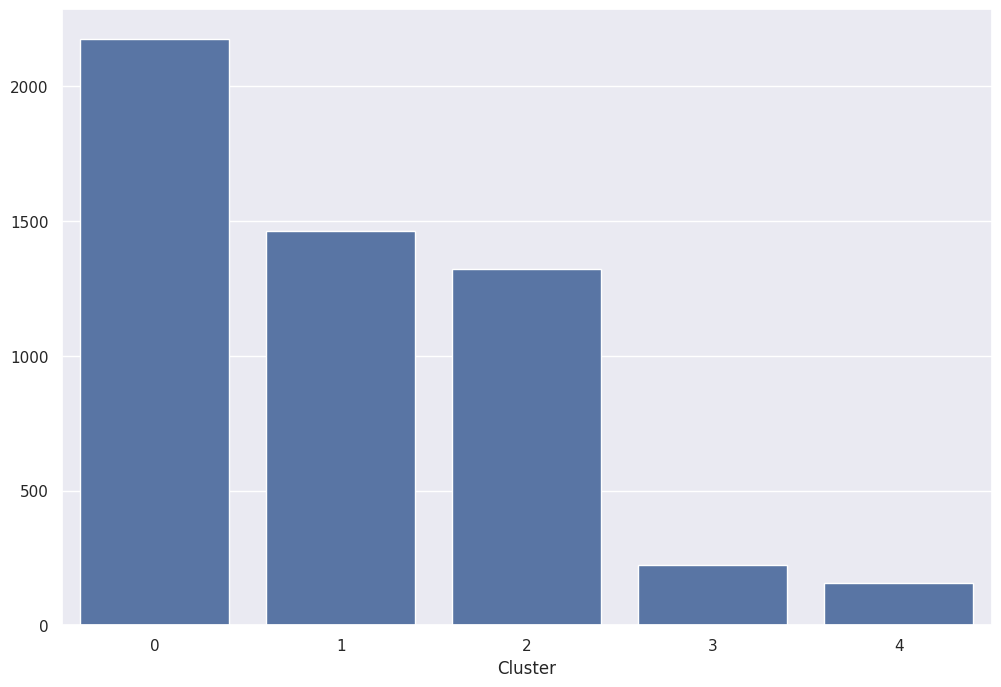

In [75]:
# Revisar la cantidad de registros en los clústeres resultado
labels = res_kmeans3.labels_
df_bicis_model3_norm['Cluster'] = labels
cluster_distrib = df_bicis_model3_norm['Cluster'].value_counts()
fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [76]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_bicis_model3_norm.groupby('Cluster').count()

,Number_of_Casualties,Speed_limit,Number_of_Vehicles,Madrugada,Mañana,Noche,Tarde,Time
Cluster,,,,,,,,
0,2177,2177,2177,2177,2177,2177,2177,2177
1,1462,1462,1462,1462,1462,1462,1462,1462
2,1321,1321,1321,1321,1321,1321,1321,1321
3,222,222,222,222,222,222,222,222
4,156,156,156,156,156,156,156,156


In [77]:
# Consultamos algunos de los registros en el clúster 0.
#Transformar el contenido de las columnas a arreglo
cols_number3 = df_bicis_model2_norm.to_numpy()
cols_number3[res_kmeans2.labels_ == 0, len(cols_transformed)-1]

array([1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0], dtype=object)

### 6.4.2 Graficar comportamiento en parejas de atributos de acuerdo a la agrupación


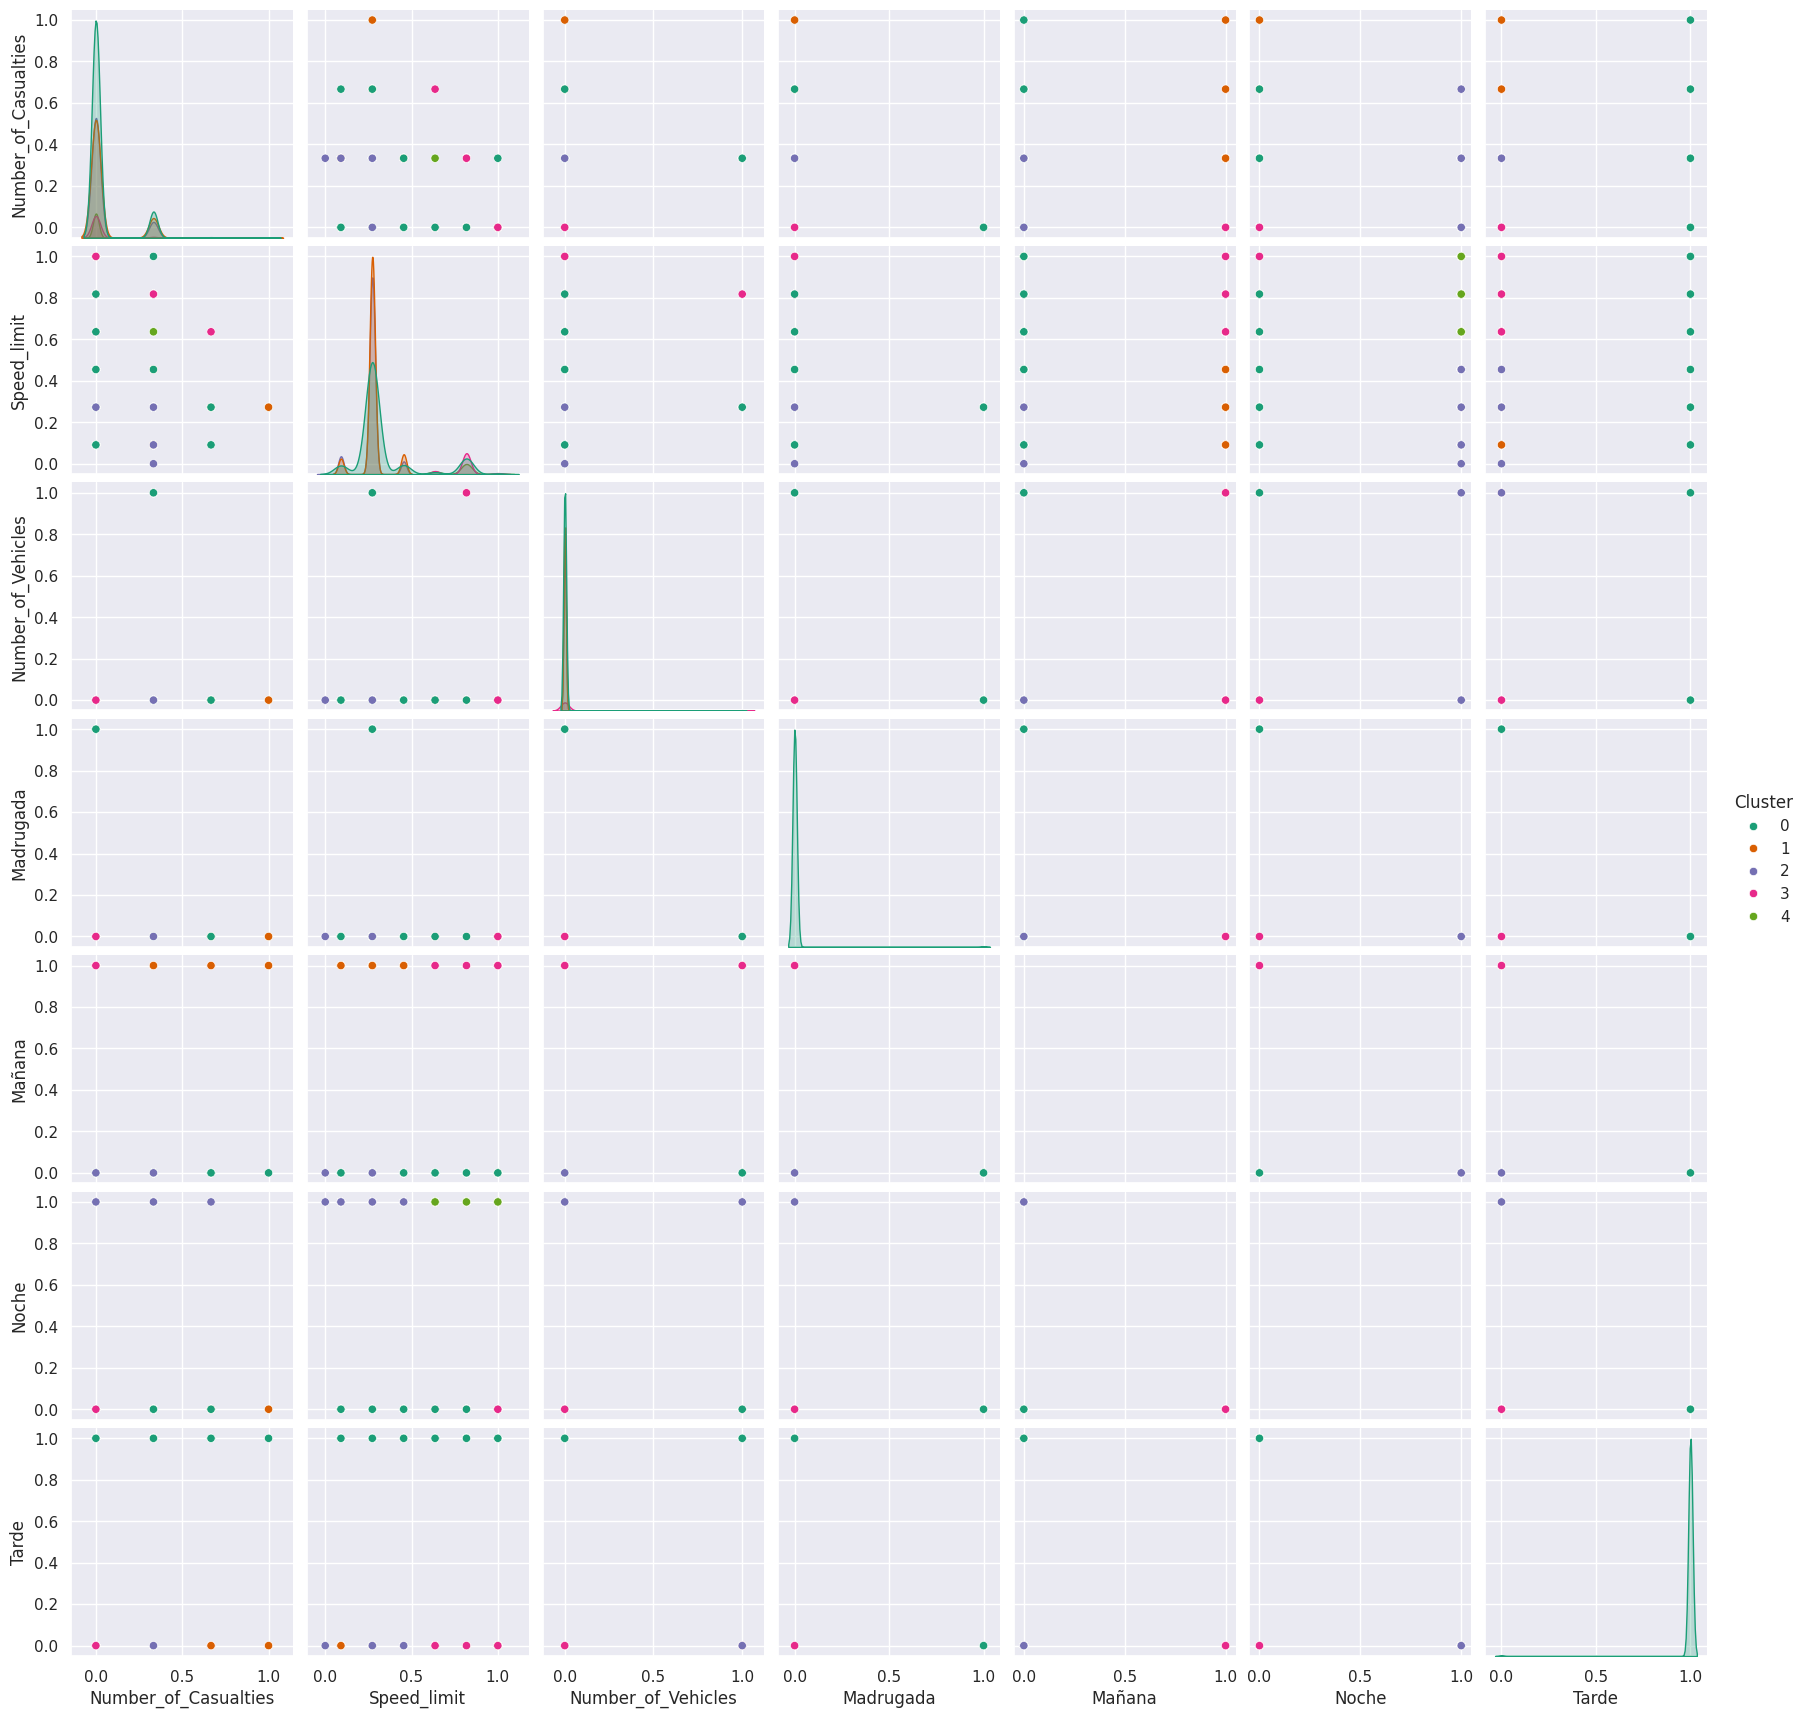

In [78]:
# El análisis de la gráfica es más dificil ya que son más columnas. Podrías filtrar las columnas para entender mejor el gráfico
# Ajustar la paleta de colores para ver mejor
sns.pairplot(data=df_bicis_model3_norm, hue="Cluster", palette="Dark2")

### 6.4.3 Graficar dos atributos y ver la relación con las agrupaciones

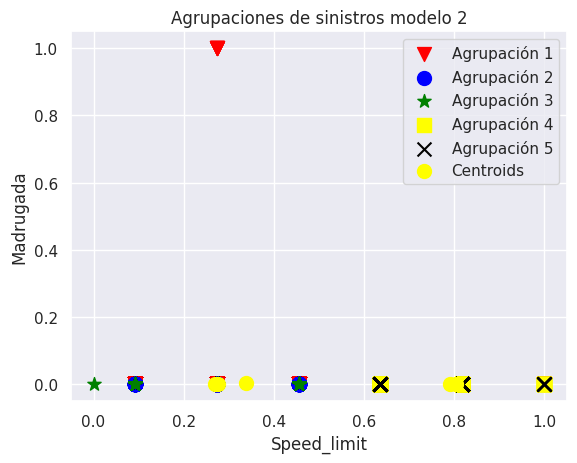

In [79]:
# El análisis lo haremos por pareja de atributos, en este caso 
plt.scatter(cols_number2[res_kmeans3.labels_ == 0, 1], cols_number2[kmeans3.labels_ == 0, 3], s = 100, marker='v', c = 'red', label = 'Agrupación 1')
plt.scatter(cols_number2[res_kmeans3.labels_ == 1, 1], cols_number2[kmeans3.labels_ == 1, 3], s = 100, marker='o', c = 'blue', label = 'Agrupación 2')
plt.scatter(cols_number2[res_kmeans3.labels_ == 2, 1], cols_number2[kmeans3.labels_ == 2, 3], s = 100, marker='*', c = 'green', label = 'Agrupación 3')
plt.scatter(cols_number2[res_kmeans3.labels_ == 3, 1], cols_number2[kmeans3.labels_ == 3, 3], s = 100, marker='s', c = 'yellow', label = 'Agrupación 4')
plt.scatter(cols_number2[res_kmeans3.labels_ == 4, 1], cols_number2[kmeans3.labels_ == 4, 3], s = 100, marker='x', c = 'black', label = 'Agrupación 5')

plt.scatter(res_kmeans3.cluster_centers_[:, 1], res_kmeans3.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Agrupaciones de sinistros modelo 2')
plt.xlabel(cols_transformed[1])
plt.ylabel(cols_transformed[3])
plt.legend()
plt.show()

In [80]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',cols_transformed[0], ' ' , cols_transformed[1], ']]', res_kmeans3.cluster_centers_)

Centroides: [[ Number_of_Casualties   Speed_limit ]] [[ 3.78196295e-02  3.39040381e-01  1.37804318e-03  2.75608636e-03
   2.16493490e-15 -6.10622664e-16  9.97243914e-01]
 [ 4.87916097e-02  2.75836339e-01  6.83994528e-04  2.75387352e-17
   1.00000000e+00 -4.44089210e-15  3.27515792e-15]
 [ 3.93641181e-02  2.68391714e-01  7.57002271e-04  2.08166817e-17
   2.05391260e-15  1.00000000e+00  3.21964677e-15]
 [ 1.50150150e-02  8.03439803e-01  4.50450450e-03  3.03576608e-18
   1.00000000e+00  9.99200722e-16  2.22044605e-15]
 [ 6.41025641e-03  7.91375291e-01  8.67361738e-19  8.67361738e-19
   4.99600361e-16  1.00000000e+00  1.72084569e-15]]


### 6.4.4 Graficar los centroides de un cluster

In [81]:
cols_transformed

['Number_of_Casualties',
 'Speed_limit',
 'Number_of_Vehicles',
 'Madrugada',
 'Mañana',
 'Noche',
 'Tarde']

In [82]:
kmeans3.cluster_centers_.tolist()

[[0.03781962945950082,
  0.33904038084102395,
  0.001378043178686262,
  0.0027560863573722954,
  2.1649348980190553e-15,
  -6.106226635438361e-16,
  0.9972439136426308],
 [0.04879160966712245,
  0.2758363387638341,
  0.0006839945280437665,
  2.7538735181131813e-17,
  1.0000000000000022,
  -4.440892098500626e-15,
  3.2751579226442118e-15],
 [0.039364118092354274,
  0.26839171426605063,
  0.0007570022710068042,
  2.0816681711721685e-17,
  2.0539125955565396e-15,
  1.0000000000000138,
  3.219646771412954e-15],
 [0.015015015015015093,
  0.8034398034398034,
  0.0045045045045044915,
  3.0357660829594124e-18,
  1.0000000000000018,
  9.992007221626409e-16,
  2.220446049250313e-15],
 [0.006410256410256478,
  0.7913752913752914,
  8.673617379884035e-19,
  8.673617379884035e-19,
  4.996003610813204e-16,
  0.9999999999999984,
  1.7208456881689926e-15]]

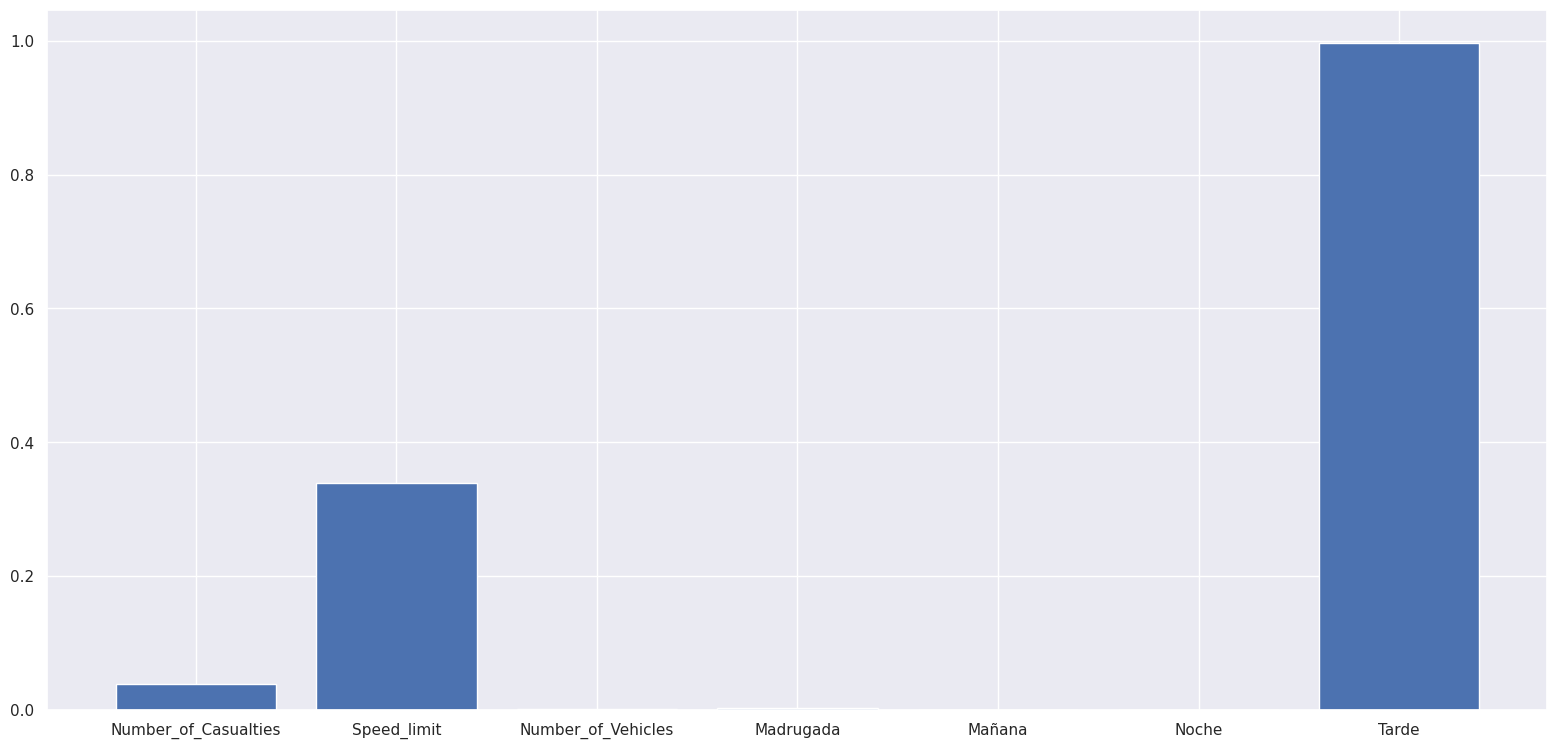

In [83]:
#visualizar los centroides de un cluster. En el ejemplo, el grupo 0. 
# En este caso dado que los datos están normalizados los valores de algunas variables son muy pequeños y no se observan en la gráfica, por ejemplo: Num_vehicles
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols_transformed,res_kmeans3.cluster_centers_.tolist()[0])
plt.show()

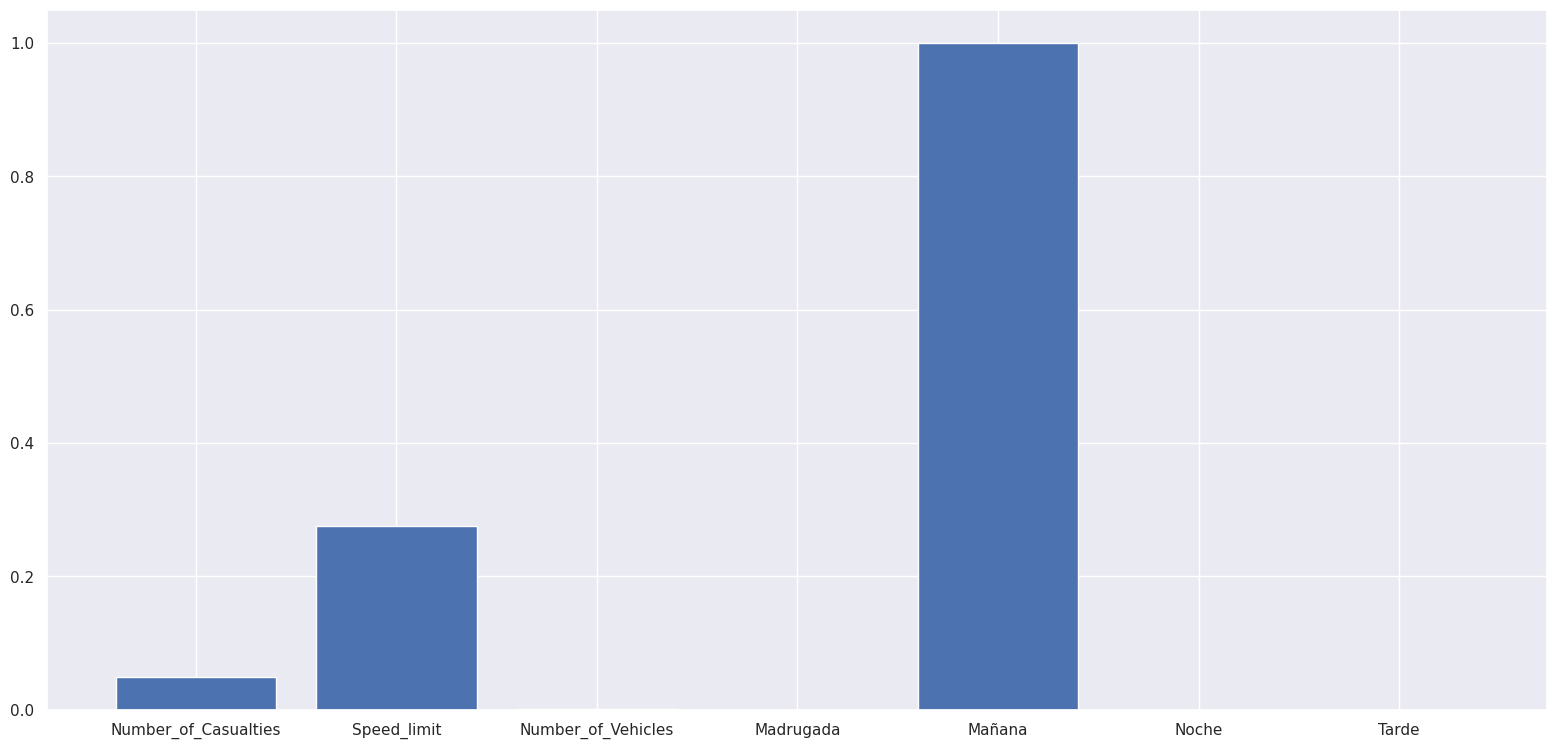

In [84]:
#visualizar los centroides de un cluster. En el ejemplo, el grupo 1. 
fig = plt.figure(figsize=(15, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(cols_transformed,res_kmeans3.cluster_centers_.tolist()[1])
plt.show()

### 6.5. Evaluar la calidad de los clústeres obtenidos

[0 1 2 3 4]


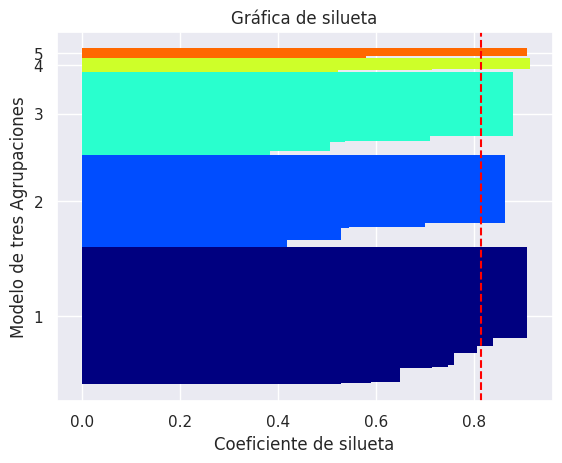

In [85]:
# Esta función puede tardar varios minutos
# Un valor cercano a 1 es un indicador de un bueno modelo. Revisa la teoría para comprender mejor el concepto
plot_silhouette(data = df_bicis_model3_norm[cols_transformed], 
                labels = res_kmeans3.labels_, 
                ylabel = 'Modelo de tres Agrupaciones')

### 6.6 Analizar y concluir
<Span style="color:red"> ¿Qué podemos decirle al negocio? ¿Las variables seleccionadas serán las apropiadas?
</Span>